# **Preprocessing**

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
from sklearn.preprocessing import OrdinalEncoder
# import dataprep.eda.create_report as report
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# read the dataset from Github repositary using pandas

df = pd.read_csv("C:/Users/Gayathri/OneDrive/Desktop/prj5/copper/Copper_Set_Result.csv")
df

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150443,DE633116-D1DF-4846-982E-55EFC3658A76,20200702.0,102.4824216,30200854.0,25.0,Won,W,41.0,0.96,1220.0,1000777,164141591,20200701.0,591.00
150444,A48374B1-E6DB-45F2-889A-1F9C27C099EB,20200702.0,208.0864686,30200854.0,25.0,Won,W,41.0,0.95,1500.0,1000227,164141591,20200701.0,589.00
150445,91643238-5C7B-4237-9A5F-63AE3D35F320,20200702.0,4.235593568,30200854.0,25.0,Won,W,41.0,0.71,1250.0,1004216,164141591,20200701.0,619.00
150446,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,20200702.0,-2000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,1001149,164141591,20200701.0,601.00


In [3]:
# verify the number of unique values in each features

for i in list(df.columns):
    print(f"{i}:{df[i].nunique()}")

id:150447
item_date:250
quantity tons:150448
customer:1124
country:17
status:2
item type:7
application:30
thickness:569
width:1347
material_ref:15668
product_ref:32
delivery date:26
selling_price:8943


In [4]:
# id feature have all the values are unique. This feature not used for prediction. So we can drop the id column

In [5]:
# verify datatypes of all features
df.dtypes

id                object
item_date        float64
quantity tons     object
customer         float64
country          float64
status            object
item type         object
application      float64
thickness        float64
width            float64
material_ref      object
product_ref        int64
delivery date    float64
selling_price    float64
dtype: object

In [6]:
# convert the data type from object to numeric

df['quantity tons'] = pd.to_numeric(df['quantity tons'], errors='coerce')
df['item_date_1'] = pd.to_datetime(df['item_date'], format='%Y%m%d', errors='coerce').dt.date
df['delivery date_1'] = pd.to_datetime(df['delivery date'], format='%Y%m%d', errors='coerce').dt.date
df.head(3)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,item_date_1,delivery date_1
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00,2021-04-01,2021-07-01
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,104991,1668701718,20210401.0,1047.00,2021-04-01,2021-04-01
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33,2021-04-01,2021-01-01


In [7]:
# check any null values in data
df.isnull().sum()

id                     1
item_date              1
quantity tons          1
customer               1
country                4
status                 0
item type              0
application            3
thickness              0
width                  0
material_ref       62799
product_ref            0
delivery date          1
selling_price          1
item_date_1            3
delivery date_1        2
dtype: int64

In [8]:
# Some rubbish values are present in ‘Material_ref’ which starts with ‘00000’ value which should be converted into null

df['material_ref'] = df['material_ref'].apply(lambda x: np.nan if str(x).startswith('00000') else x)
df.head(3)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,item_date_1,delivery date_1
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00,2021-04-01,2021-07-01
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,104991,1668701718,20210401.0,1047.00,2021-04-01,2021-04-01
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33,2021-04-01,2021-01-01


In [9]:
# check null values for all features
df.isnull().sum()

id                     1
item_date              1
quantity tons          1
customer               1
country                4
status                 0
item type              0
application            3
thickness              0
width                  0
material_ref       62835
product_ref            0
delivery date          1
selling_price          1
item_date_1            3
delivery date_1        2
dtype: int64

In [10]:
# material ref have more than 55% are null values and id have all are unique values. so we have drop both columns.

df.drop(columns=['id','material_ref'], inplace=True)
df

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,item_date_1,delivery date_1
0,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,20210701.0,854.00,2021-04-01,2021-07-01
1,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,20210401.0,1047.00,2021-04-01,2021-04-01
2,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,20210101.0,644.33,2021-04-01,2021-01-01
3,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,20210101.0,768.00,2021-04-01,2021-01-01
4,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,20210301.0,577.00,2021-04-01,2021-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150443,20200702.0,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,164141591,20200701.0,591.00,2020-07-02,2020-07-01
150444,20200702.0,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,164141591,20200701.0,589.00,2020-07-02,2020-07-01
150445,20200702.0,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,164141591,20200701.0,619.00,2020-07-02,2020-07-01
150446,20200702.0,-2000.000000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,164141591,20200701.0,601.00,2020-07-02,2020-07-01


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
item_date,150447.0,2.020457e+07,4.553500e+03,19950000.00,2.020093e+07,2.020120e+07,2.021020e+07,2.021040e+07
quantity tons,150447.0,9.445873e+01,4.409473e+02,-2000.00,1.069873e+01,2.993464e+01,6.486820e+01,7.025236e+04
customer,150447.0,3.027510e+07,9.455083e+06,12458.00,3.019689e+07,3.020531e+07,3.027982e+07,2.147484e+09
country,150444.0,4.539109e+01,2.448819e+01,25.00,2.600000e+01,3.000000e+01,7.800000e+01,1.130000e+02
application,150445.0,2.519511e+01,1.764029e+01,2.00,1.000000e+01,1.500000e+01,4.100000e+01,9.900000e+01
thickness,150448.0,2.618359e+00,7.115448e+00,0.18,7.400000e-01,1.500000e+00,3.000000e+00,2.500000e+03
width,150448.0,1.297840e+03,2.661565e+02,1.00,1.176000e+03,1.250000e+03,1.500000e+03,2.990000e+03
product_ref,150448.0,4.748400e+08,7.172630e+08,611728.00,6.283770e+05,6.406650e+05,1.332077e+09,1.722208e+09
delivery date,150447.0,2.020729e+07,4.427745e+03,20190401.00,2.020100e+07,2.021010e+07,2.021040e+07,2.022010e+07
selling_price,150447.0,8.257639e+02,2.908797e+02,-1160.00,6.710000e+02,8.110000e+02,9.510000e+02,8.123614e+04


In [12]:
# quantity and selling price values are not below 0. so we convert to null for below 0 values.

df['quantity tons'] = df['quantity tons'].apply(lambda x: np.nan if x<=0 else x)
df['selling_price'] = df['selling_price'].apply(lambda x: np.nan if x<=0 else x)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
item_date,150447.0,2.020457e+07,4.553500e+03,1.995000e+07,2.020093e+07,2.020120e+07,2.021020e+07,2.021040e+07
quantity tons,150444.0,9.447406e+01,4.409184e+02,1.000000e-05,1.069997e+01,2.993481e+01,6.487005e+01,7.025236e+04
customer,150447.0,3.027510e+07,9.455083e+06,1.245800e+04,3.019689e+07,3.020531e+07,3.027982e+07,2.147484e+09
country,150444.0,4.539109e+01,2.448819e+01,2.500000e+01,2.600000e+01,3.000000e+01,7.800000e+01,1.130000e+02
application,150445.0,2.519511e+01,1.764029e+01,2.000000e+00,1.000000e+01,1.500000e+01,4.100000e+01,9.900000e+01
thickness,150448.0,2.618359e+00,7.115448e+00,1.800000e-01,7.400000e-01,1.500000e+00,3.000000e+00,2.500000e+03
width,150448.0,1.297840e+03,2.661565e+02,1.000000e+00,1.176000e+03,1.250000e+03,1.500000e+03,2.990000e+03
product_ref,150448.0,4.748400e+08,7.172630e+08,6.117280e+05,6.283770e+05,6.406650e+05,1.332077e+09,1.722208e+09
delivery date,150447.0,2.020729e+07,4.427745e+03,2.019040e+07,2.020100e+07,2.021010e+07,2.021040e+07,2.022010e+07
selling_price,150442.0,8.258091e+02,2.907701e+02,1.000000e-01,6.710000e+02,8.110000e+02,9.510000e+02,8.123614e+04


In [13]:
# check null values for all features
df.isnull().sum()

item_date          1
quantity tons      4
customer           1
country            4
status             0
item type          0
application        3
thickness          0
width              0
product_ref        0
delivery date      1
selling_price      6
item_date_1        3
delivery date_1    2
dtype: int64

In [14]:
# Handling null values using median and mode
# median - middle value in dataset (asc/desc), mode - value that appears most frequently in dataset

# object datatype using mode
df['item_date'].fillna(df['item_date'].mode().iloc[0], inplace=True)
df['item_date_1'].fillna(df['item_date_1'].mode().iloc[0], inplace=True)
df['status'].fillna(df['status'].mode().iloc[0], inplace=True)
df['delivery date'].fillna(df['delivery date'].mode().iloc[0], inplace=True)
df['delivery date_1'].fillna(df['delivery date_1'].mode().iloc[0], inplace=True)

#numerical datatype using median
df['quantity tons'].fillna(df['quantity tons'].median(), inplace=True)
df['customer'].fillna(df['customer'].median(), inplace=True)
df['country'].fillna(df['country'].median(), inplace=True)
df['application'].fillna(df['application'].median(), inplace=True)
df['thickness'].fillna(df['thickness'].median(), inplace=True)
df['selling_price'].fillna(df['selling_price'].median(), inplace=True)


In [15]:
df.isnull().sum()

item_date          0
quantity tons      0
customer           0
country            0
status             0
item type          0
application        0
thickness          0
width              0
product_ref        0
delivery date      0
selling_price      0
item_date_1        0
delivery date_1    0
dtype: int64

In [16]:
df['status'].unique()

array(['Won', 'Lost'], dtype=object)

In [17]:
df['item type'].unique()

array(['W', 'WI', 'S', 'Others', 'PL', 'IPL', 'SLAWR'], dtype=object)

In [18]:
# convert categorical data into numerical data - using map and ordinal encoder methods

df['status'] = df['status'].map({'Lost':0, 'Won':1, 'Draft':2, 'To be approved':3, 'Not lost for AM':4,
                                 'Wonderful':5, 'Revised':6, 'Offered':7, 'Offerable':8})
df['item type'] = OrdinalEncoder().fit_transform(df[['item type']])
df

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,item_date_1,delivery date_1
0,20210401.0,54.151139,30156308.0,28.0,1,5.0,10.0,2.00,1500.0,1670798778,20210701.0,854.00,2021-04-01,2021-07-01
1,20210401.0,768.024839,30202938.0,25.0,1,5.0,41.0,0.80,1210.0,1668701718,20210401.0,1047.00,2021-04-01,2021-04-01
2,20210401.0,386.127949,30153963.0,30.0,1,6.0,28.0,0.38,952.0,628377,20210101.0,644.33,2021-04-01,2021-01-01
3,20210401.0,202.411065,30349574.0,32.0,1,3.0,59.0,2.30,1317.0,1668701718,20210101.0,768.00,2021-04-01,2021-01-01
4,20210401.0,785.526262,30211560.0,28.0,1,5.0,10.0,4.00,2000.0,640665,20210301.0,577.00,2021-04-01,2021-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150443,20200702.0,102.482422,30200854.0,25.0,1,5.0,41.0,0.96,1220.0,164141591,20200701.0,591.00,2020-07-02,2020-07-01
150444,20200702.0,208.086469,30200854.0,25.0,1,5.0,41.0,0.95,1500.0,164141591,20200701.0,589.00,2020-07-02,2020-07-01
150445,20200702.0,4.235594,30200854.0,25.0,1,5.0,41.0,0.71,1250.0,164141591,20200701.0,619.00,2020-07-02,2020-07-01
150446,20200702.0,29.934807,30200854.0,25.0,1,5.0,41.0,0.85,1250.0,164141591,20200701.0,601.00,2020-07-02,2020-07-01


In [19]:
# array(['W', 'WI', 'S', 'Others', 'PL', 'IPL', 'SLAWR'], dtype=object)
df['item type'].unique()

array([5., 6., 3., 1., 2., 0., 4.])

In [20]:
# final verification of null values after encoding
df.isnull().sum()

item_date          0
quantity tons      0
customer           0
country            0
status             0
item type          0
application        0
thickness          0
width              0
product_ref        0
delivery date      0
selling_price      0
item_date_1        0
delivery date_1    0
dtype: int64

In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
item_date,150448.0,2.020457e+07,4.553493e+03,1.995000e+07,2.020093e+07,2.020120e+07,2.021020e+07,2.021040e+07
quantity tons,150448.0,9.447234e+01,4.409127e+02,1.000000e-05,1.070011e+01,2.993481e+01,6.486744e+01,7.025236e+04
customer,150448.0,3.027510e+07,9.455052e+06,1.245800e+04,3.019689e+07,3.020531e+07,3.027982e+07,2.147484e+09
country,150448.0,4.539068e+01,2.448800e+01,2.500000e+01,2.600000e+01,3.000000e+01,7.800000e+01,1.130000e+02
status,150448.0,7.710970e-01,4.201281e-01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
item type,150448.0,4.192346e+00,1.049145e+00,0.000000e+00,3.000000e+00,5.000000e+00,5.000000e+00,6.000000e+00
application,150448.0,2.519490e+01,1.764017e+01,2.000000e+00,1.000000e+01,1.500000e+01,4.100000e+01,9.900000e+01
thickness,150448.0,2.618359e+00,7.115448e+00,1.800000e-01,7.400000e-01,1.500000e+00,3.000000e+00,2.500000e+03
width,150448.0,1.297840e+03,2.661565e+02,1.000000e+00,1.176000e+03,1.250000e+03,1.500000e+03,2.990000e+03
product_ref,150448.0,4.748400e+08,7.172630e+08,6.117280e+05,6.283770e+05,6.406650e+05,1.332077e+09,1.722208e+09


# **Skewness Handling - Feature Scaling (Log Transformation)**

In [22]:
# find outliers - box plot & skewed data - hist plot and violin plot

def plot(df, column):
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.boxplot(data=df, x=column)
    plt.title(f'Box Plot for {column}')

    plt.subplot(1,3,2)
    sns.histplot(data=df, x=column, kde=True, bins=50)
    plt.title(f'Distribution Plot for {column}')

    plt.subplot(1,3,3)
    sns.violinplot(data=df, x=column)
    plt.title(f'Violin Plot for {column}')
    plt.show()

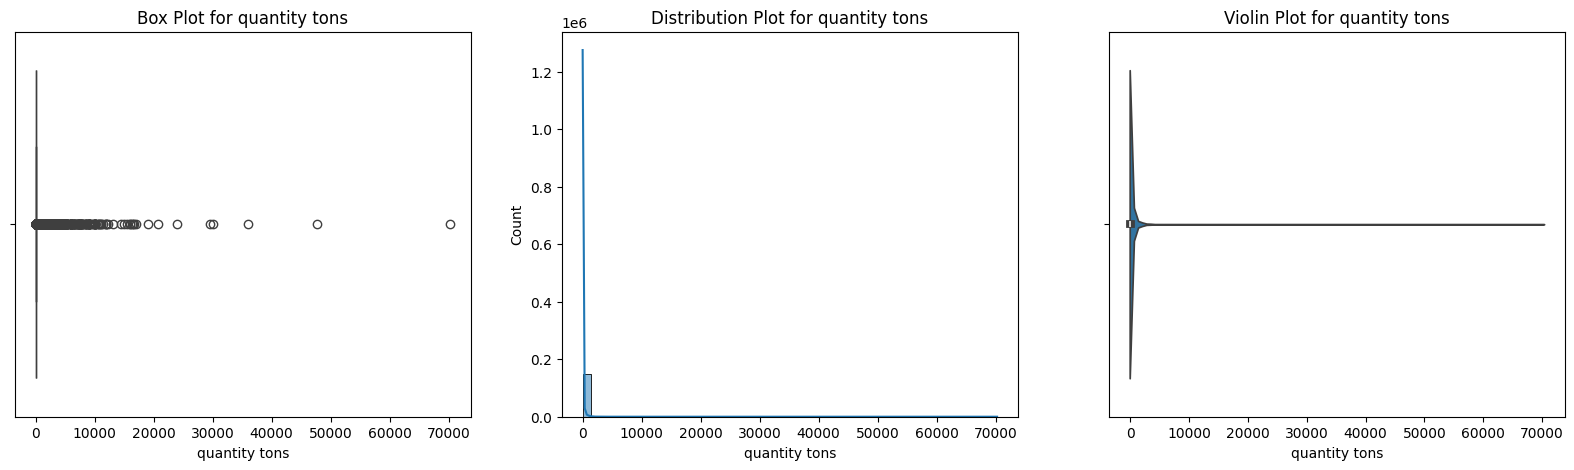

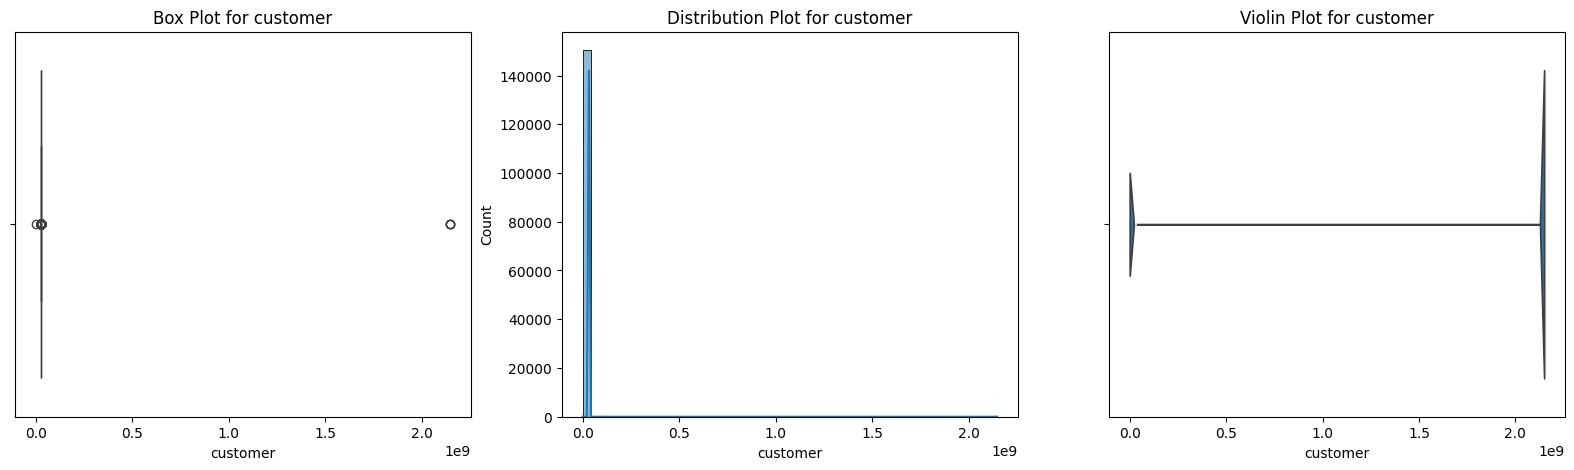

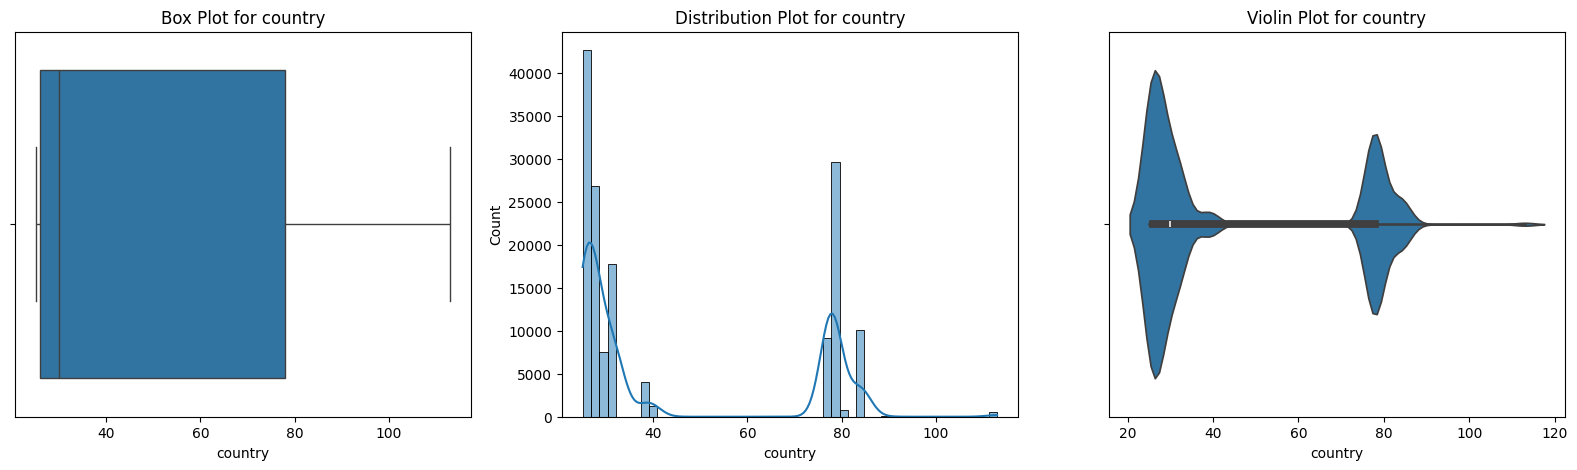

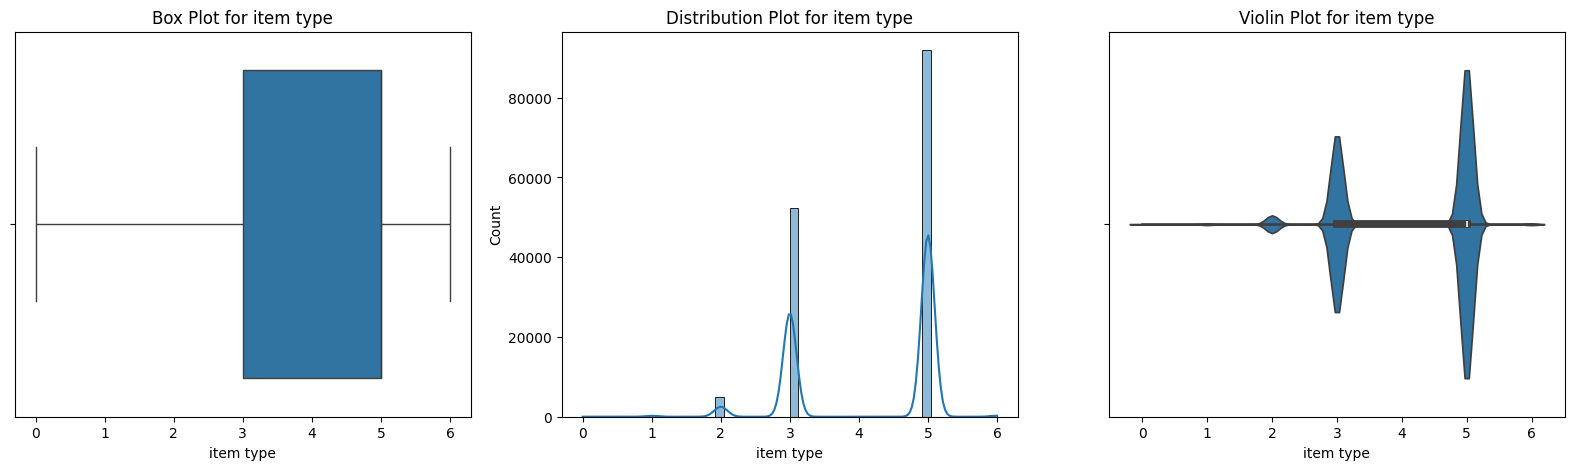

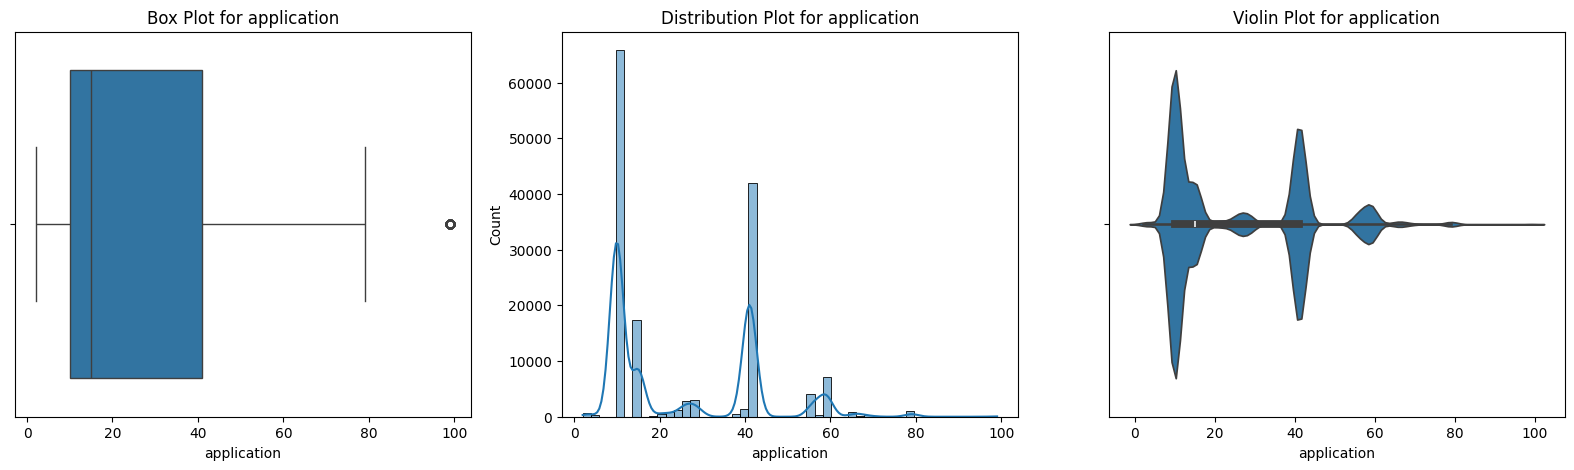

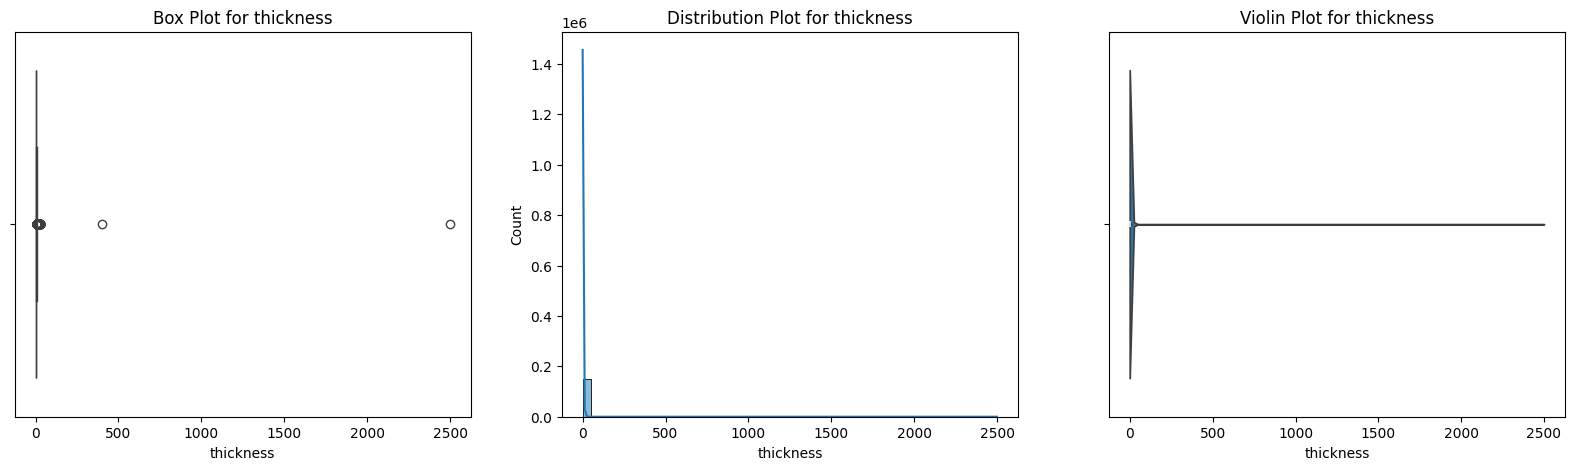

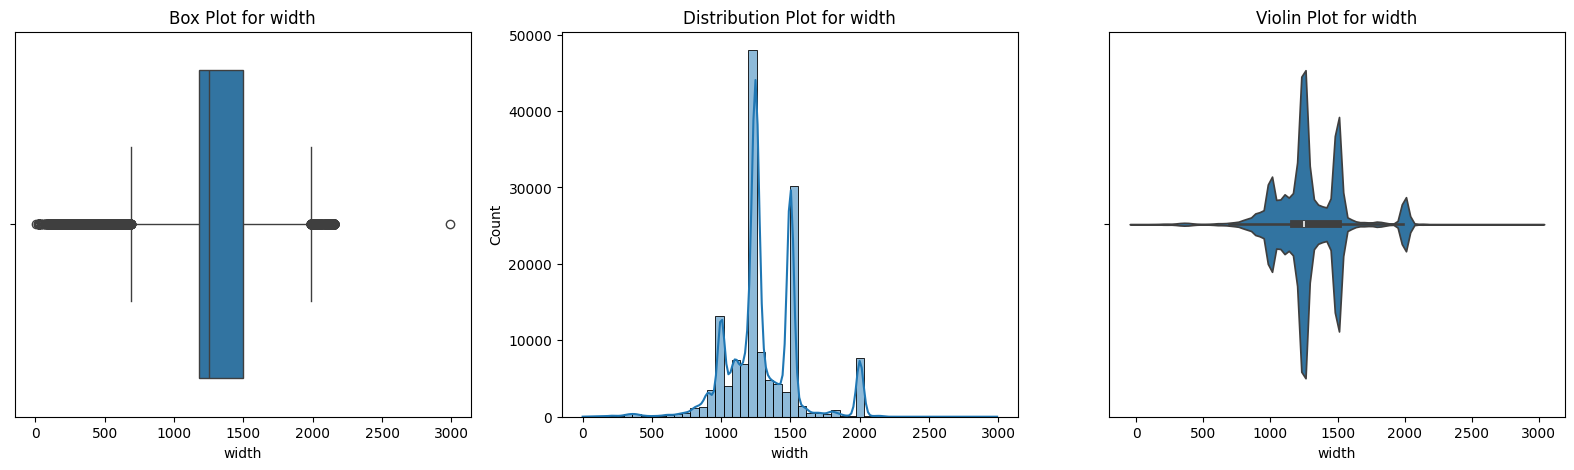

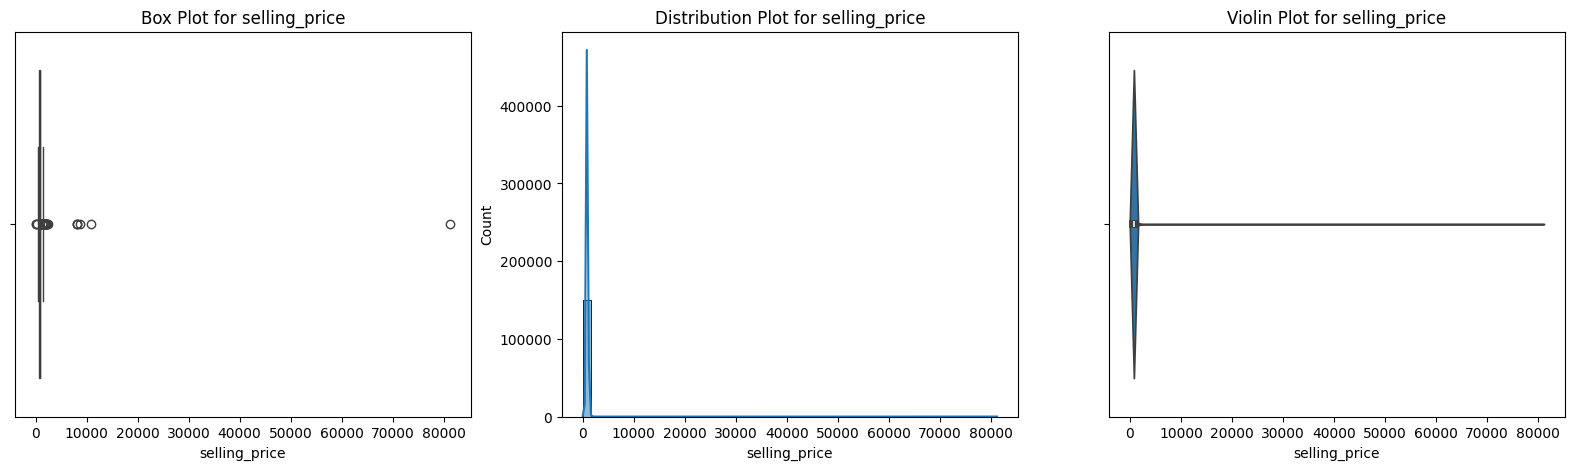

In [23]:
for i in ['quantity tons', 'customer', 'country', 'item type', 'application', 'thickness', 'width', 'selling_price']:
    plot(df, i)

In [24]:
# quantity tons, thickness and selling price data are skewd. so using the log transformation method to handle the skewness data

df1 = df.copy()
df1['quantity tons_log'] = np.log(df1['quantity tons'])
df1['thickness_log'] = np.log(df1['thickness'])
df1['selling_price_log'] = np.log(df1['selling_price'])
df1

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,item_date_1,delivery date_1,quantity tons_log,thickness_log,selling_price_log
0,20210401.0,54.151139,30156308.0,28.0,1,5.0,10.0,2.00,1500.0,1670798778,20210701.0,854.00,2021-04-01,2021-07-01,3.991779,0.693147,6.749931
1,20210401.0,768.024839,30202938.0,25.0,1,5.0,41.0,0.80,1210.0,1668701718,20210401.0,1047.00,2021-04-01,2021-04-01,6.643822,-0.223144,6.953684
2,20210401.0,386.127949,30153963.0,30.0,1,6.0,28.0,0.38,952.0,628377,20210101.0,644.33,2021-04-01,2021-01-01,5.956169,-0.967584,6.468211
3,20210401.0,202.411065,30349574.0,32.0,1,3.0,59.0,2.30,1317.0,1668701718,20210101.0,768.00,2021-04-01,2021-01-01,5.310301,0.832909,6.643790
4,20210401.0,785.526262,30211560.0,28.0,1,5.0,10.0,4.00,2000.0,640665,20210301.0,577.00,2021-04-01,2021-03-01,6.666354,1.386294,6.357842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150443,20200702.0,102.482422,30200854.0,25.0,1,5.0,41.0,0.96,1220.0,164141591,20200701.0,591.00,2020-07-02,2020-07-01,4.629691,-0.040822,6.381816
150444,20200702.0,208.086469,30200854.0,25.0,1,5.0,41.0,0.95,1500.0,164141591,20200701.0,589.00,2020-07-02,2020-07-01,5.337954,-0.051293,6.378426
150445,20200702.0,4.235594,30200854.0,25.0,1,5.0,41.0,0.71,1250.0,164141591,20200701.0,619.00,2020-07-02,2020-07-01,1.443523,-0.342490,6.428105
150446,20200702.0,29.934807,30200854.0,25.0,1,5.0,41.0,0.85,1250.0,164141591,20200701.0,601.00,2020-07-02,2020-07-01,3.399022,-0.162519,6.398595


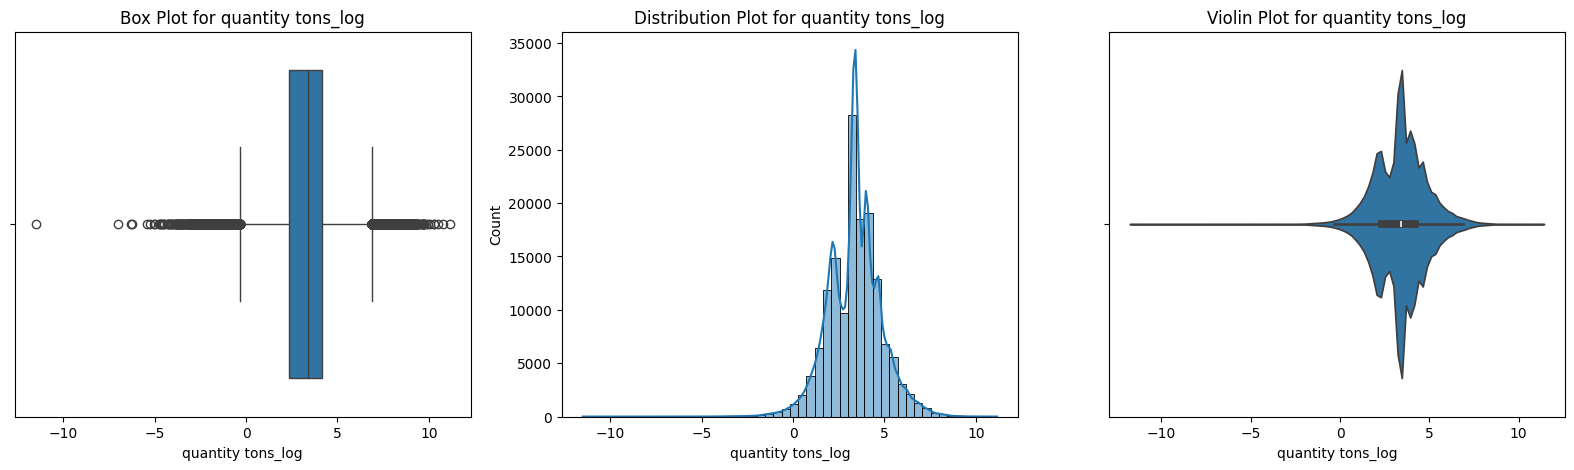

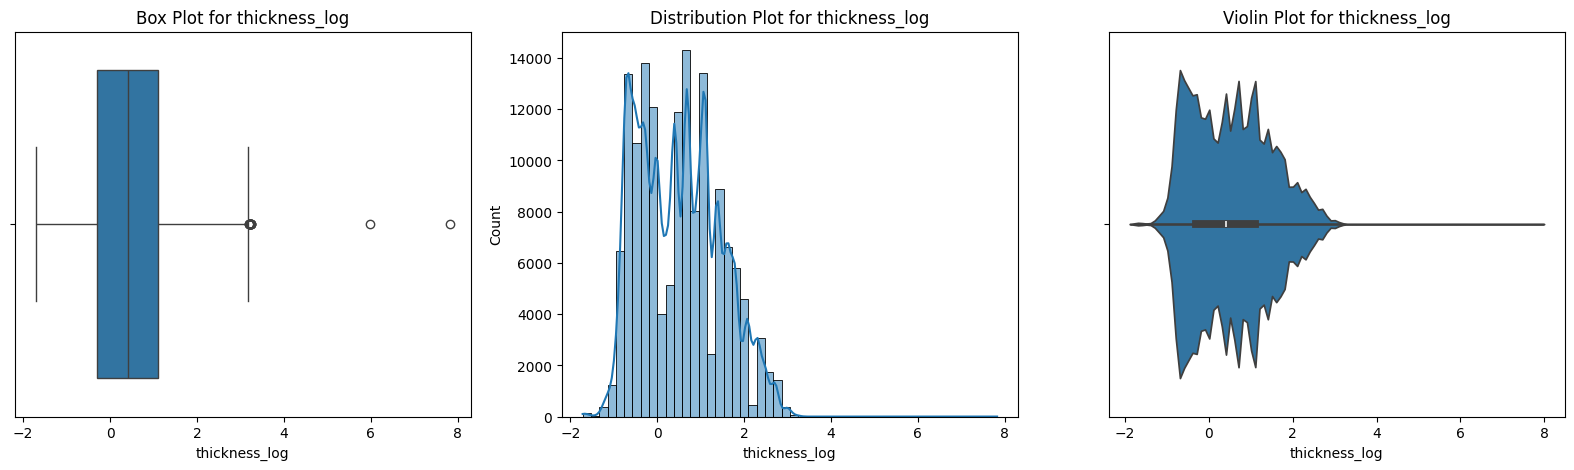

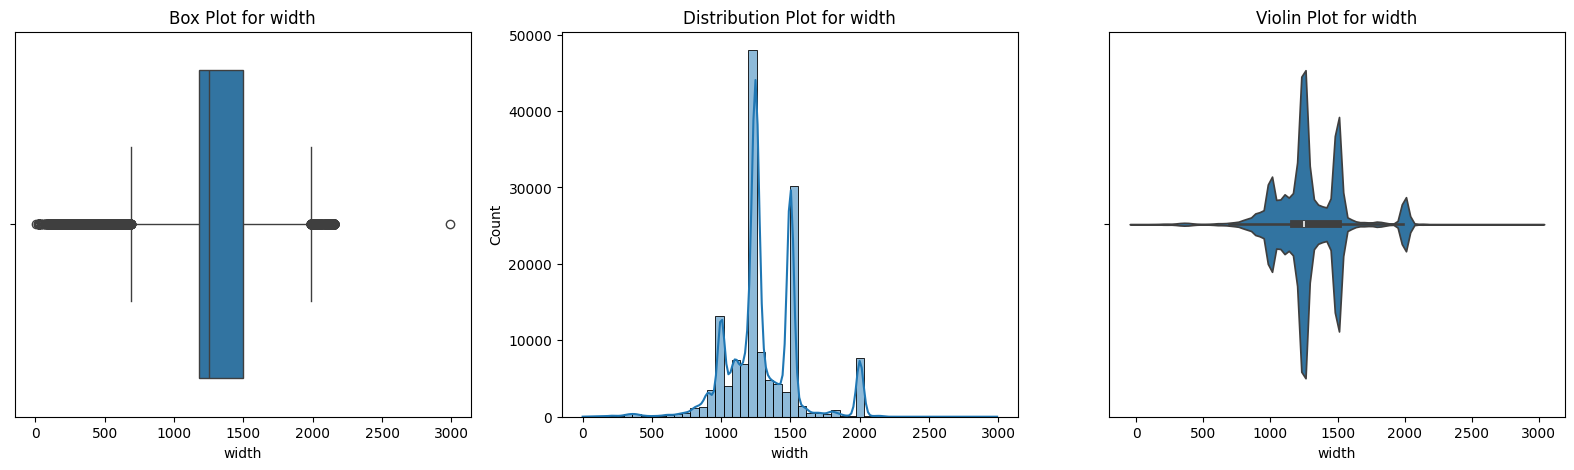

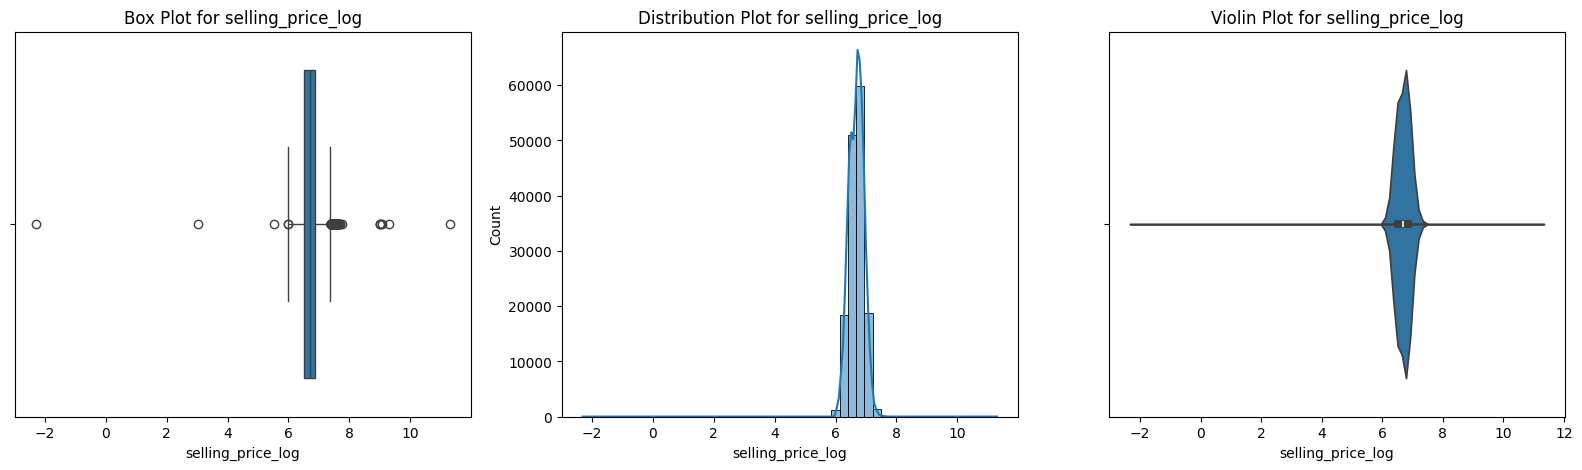

In [25]:
# after log transformation the data are normally distributed and reduced the skewness. [hist plot and violin plot]
for i in ['quantity tons_log', 'thickness_log', 'width', 'selling_price_log']:
    plot(df1, i)

# **Outliers Handling - Interquartile Range (IQR) method**

In [26]:
df2 = df1.copy()
df2

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,item_date_1,delivery date_1,quantity tons_log,thickness_log,selling_price_log
0,20210401.0,54.151139,30156308.0,28.0,1,5.0,10.0,2.00,1500.0,1670798778,20210701.0,854.00,2021-04-01,2021-07-01,3.991779,0.693147,6.749931
1,20210401.0,768.024839,30202938.0,25.0,1,5.0,41.0,0.80,1210.0,1668701718,20210401.0,1047.00,2021-04-01,2021-04-01,6.643822,-0.223144,6.953684
2,20210401.0,386.127949,30153963.0,30.0,1,6.0,28.0,0.38,952.0,628377,20210101.0,644.33,2021-04-01,2021-01-01,5.956169,-0.967584,6.468211
3,20210401.0,202.411065,30349574.0,32.0,1,3.0,59.0,2.30,1317.0,1668701718,20210101.0,768.00,2021-04-01,2021-01-01,5.310301,0.832909,6.643790
4,20210401.0,785.526262,30211560.0,28.0,1,5.0,10.0,4.00,2000.0,640665,20210301.0,577.00,2021-04-01,2021-03-01,6.666354,1.386294,6.357842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150443,20200702.0,102.482422,30200854.0,25.0,1,5.0,41.0,0.96,1220.0,164141591,20200701.0,591.00,2020-07-02,2020-07-01,4.629691,-0.040822,6.381816
150444,20200702.0,208.086469,30200854.0,25.0,1,5.0,41.0,0.95,1500.0,164141591,20200701.0,589.00,2020-07-02,2020-07-01,5.337954,-0.051293,6.378426
150445,20200702.0,4.235594,30200854.0,25.0,1,5.0,41.0,0.71,1250.0,164141591,20200701.0,619.00,2020-07-02,2020-07-01,1.443523,-0.342490,6.428105
150446,20200702.0,29.934807,30200854.0,25.0,1,5.0,41.0,0.85,1250.0,164141591,20200701.0,601.00,2020-07-02,2020-07-01,3.399022,-0.162519,6.398595


In [27]:
# Using IQR and clip() methods to handle the outliers and add a new column of dataframe

def outlier(df, column):
    iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
    upper_threshold = df[column].quantile(0.75) + (1.5*iqr)
    lower_threshold = df[column].quantile(0.25) - (1.5*iqr)
    df[column] = df[column].clip(lower_threshold, upper_threshold)

In [28]:
# (Ex: lower threshold = 5 and upper threshold = 20)
# above upper threshold values (>20) are converted to upper threshold value (20) in features
# below lower threshold values (<5)  are converted to lower threshold value (5)  in features

outlier(df2, 'quantity tons_log')
outlier(df2, 'thickness_log')
outlier(df2, 'selling_price_log')
outlier(df2, 'width')
df2

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,item_date_1,delivery date_1,quantity tons_log,thickness_log,selling_price_log
0,20210401.0,54.151139,30156308.0,28.0,1,5.0,10.0,2.00,1500.0,1670798778,20210701.0,854.00,2021-04-01,2021-07-01,3.991779,0.693147,6.749931
1,20210401.0,768.024839,30202938.0,25.0,1,5.0,41.0,0.80,1210.0,1668701718,20210401.0,1047.00,2021-04-01,2021-04-01,6.643822,-0.223144,6.953684
2,20210401.0,386.127949,30153963.0,30.0,1,6.0,28.0,0.38,952.0,628377,20210101.0,644.33,2021-04-01,2021-01-01,5.956169,-0.967584,6.468211
3,20210401.0,202.411065,30349574.0,32.0,1,3.0,59.0,2.30,1317.0,1668701718,20210101.0,768.00,2021-04-01,2021-01-01,5.310301,0.832909,6.643790
4,20210401.0,785.526262,30211560.0,28.0,1,5.0,10.0,4.00,1986.0,640665,20210301.0,577.00,2021-04-01,2021-03-01,6.666354,1.386294,6.357842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150443,20200702.0,102.482422,30200854.0,25.0,1,5.0,41.0,0.96,1220.0,164141591,20200701.0,591.00,2020-07-02,2020-07-01,4.629691,-0.040822,6.381816
150444,20200702.0,208.086469,30200854.0,25.0,1,5.0,41.0,0.95,1500.0,164141591,20200701.0,589.00,2020-07-02,2020-07-01,5.337954,-0.051293,6.378426
150445,20200702.0,4.235594,30200854.0,25.0,1,5.0,41.0,0.71,1250.0,164141591,20200701.0,619.00,2020-07-02,2020-07-01,1.443523,-0.342490,6.428105
150446,20200702.0,29.934807,30200854.0,25.0,1,5.0,41.0,0.85,1250.0,164141591,20200701.0,601.00,2020-07-02,2020-07-01,3.399022,-0.162519,6.398595


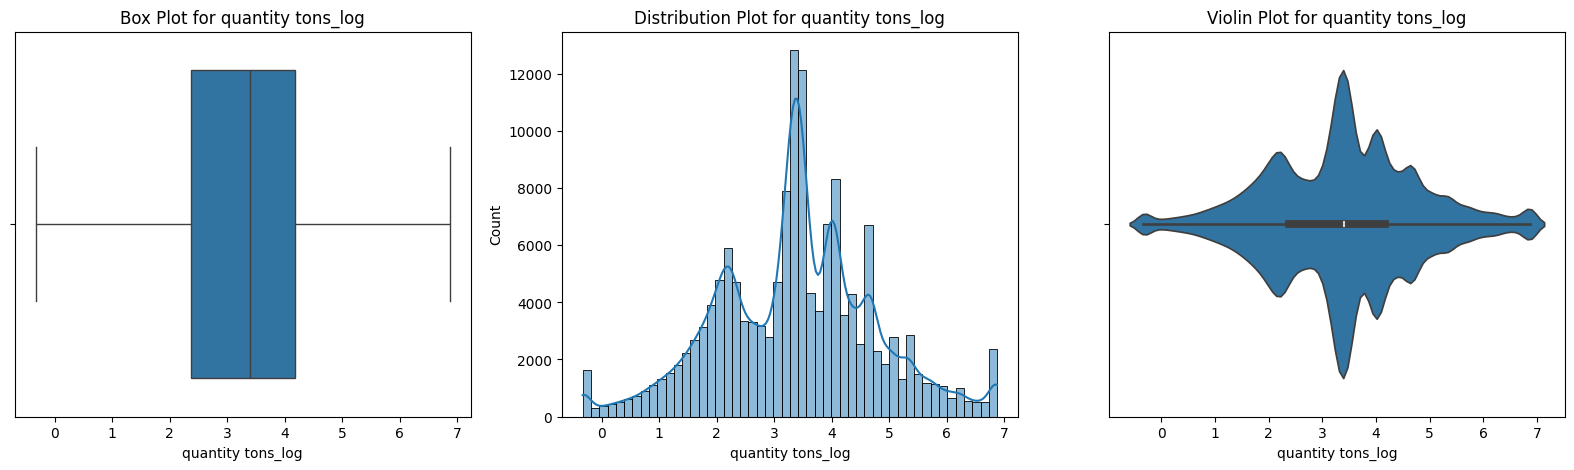

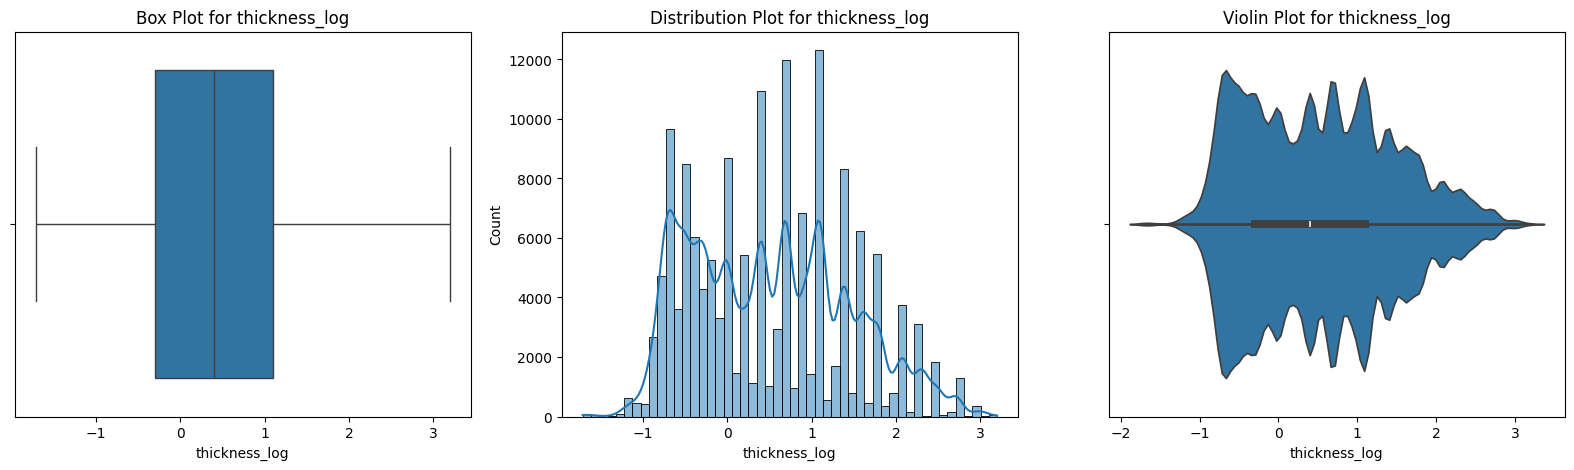

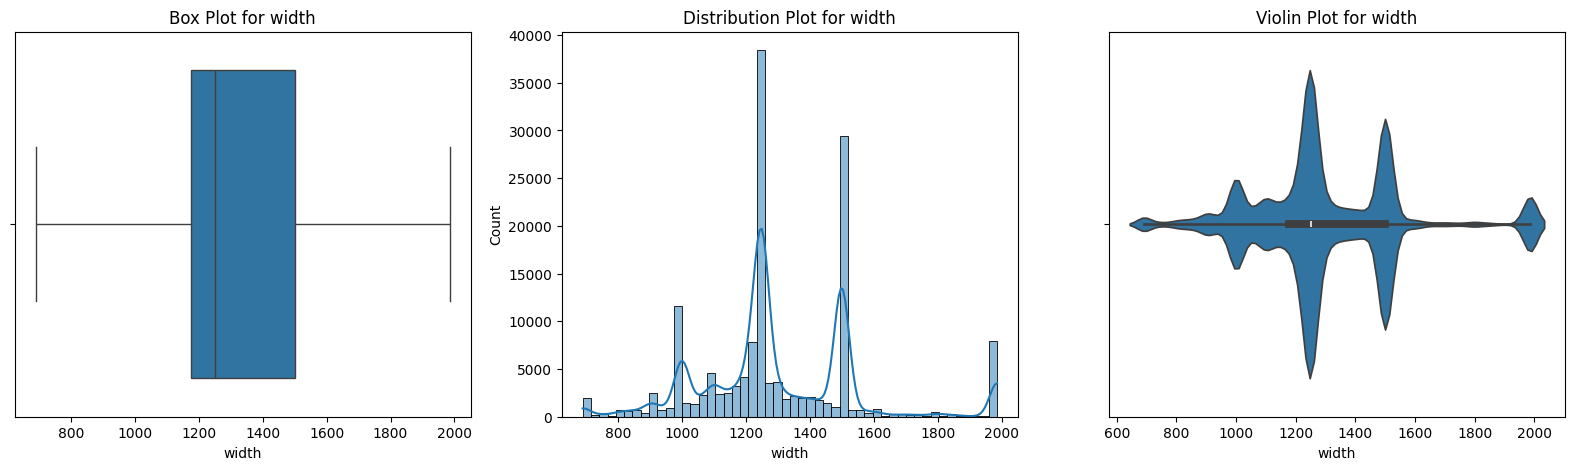

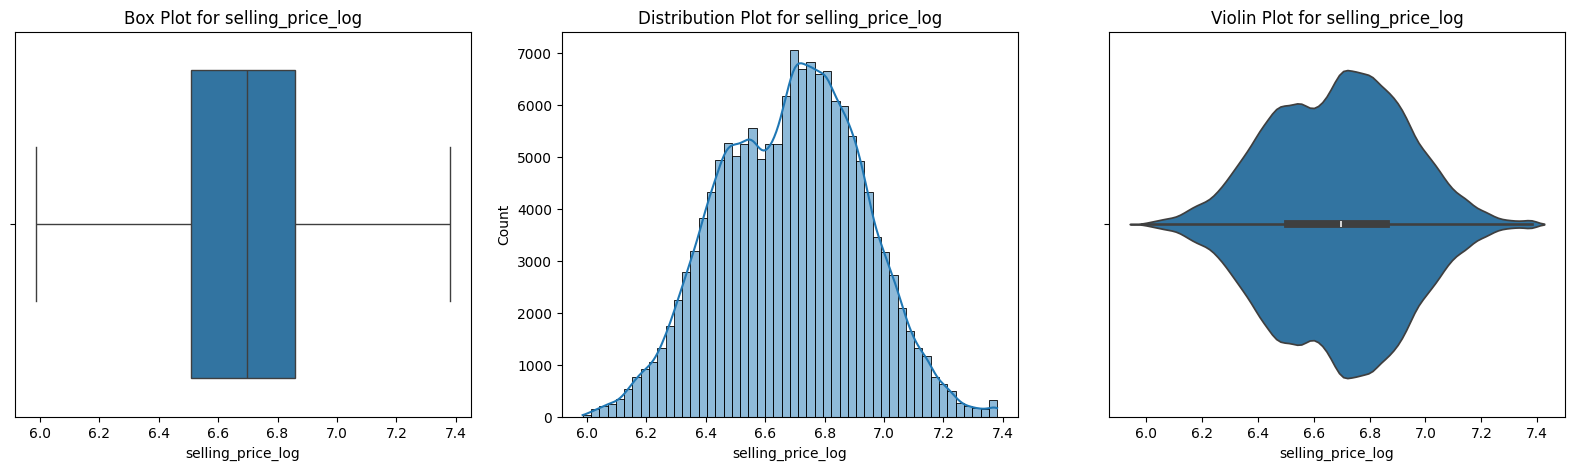

In [29]:
# transform the outliers to within range using IQR and clip() methods - box plot

for i in ['quantity tons_log', 'thickness_log', 'width', 'selling_price_log']:
    plot(df2, i)

In [30]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
item_date,150448.0,2.020457e+07,4.553493e+03,1.995000e+07,2.020093e+07,2.020120e+07,2.021020e+07,2.021040e+07
quantity tons,150448.0,9.447234e+01,4.409127e+02,1.000000e-05,1.070011e+01,2.993481e+01,6.486744e+01,7.025236e+04
customer,150448.0,3.027510e+07,9.455052e+06,1.245800e+04,3.019689e+07,3.020531e+07,3.027982e+07,2.147484e+09
country,150448.0,4.539068e+01,2.448800e+01,2.500000e+01,2.600000e+01,3.000000e+01,7.800000e+01,1.130000e+02
status,150448.0,7.710970e-01,4.201281e-01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
item type,150448.0,4.192346e+00,1.049145e+00,0.000000e+00,3.000000e+00,5.000000e+00,5.000000e+00,6.000000e+00
application,150448.0,2.519490e+01,1.764017e+01,2.000000e+00,1.000000e+01,1.500000e+01,4.100000e+01,9.900000e+01
thickness,150448.0,2.618359e+00,7.115448e+00,1.800000e-01,7.400000e-01,1.500000e+00,3.000000e+00,2.500000e+03
width,150448.0,1.299995e+03,2.540402e+02,6.900000e+02,1.176000e+03,1.250000e+03,1.500000e+03,1.986000e+03
product_ref,150448.0,4.748400e+08,7.172630e+08,6.117280e+05,6.283770e+05,6.406650e+05,1.332077e+09,1.722208e+09


In [31]:
# after add the new column of 'quantity tons_log', 'thickness_log', 'selling_price_log', drop the existing columns
df3 = df2.drop(columns=['quantity tons', 'thickness', 'selling_price'])
df3

,item_date,customer,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery date_1,quantity tons_log,thickness_log,selling_price_log
0,20210401.0,30156308.0,28.0,1,5.0,10.0,1500.0,1670798778,20210701.0,2021-04-01,2021-07-01,3.991779,0.693147,6.749931
1,20210401.0,30202938.0,25.0,1,5.0,41.0,1210.0,1668701718,20210401.0,2021-04-01,2021-04-01,6.643822,-0.223144,6.953684
2,20210401.0,30153963.0,30.0,1,6.0,28.0,952.0,628377,20210101.0,2021-04-01,2021-01-01,5.956169,-0.967584,6.468211
3,20210401.0,30349574.0,32.0,1,3.0,59.0,1317.0,1668701718,20210101.0,2021-04-01,2021-01-01,5.310301,0.832909,6.643790
4,20210401.0,30211560.0,28.0,1,5.0,10.0,1986.0,640665,20210301.0,2021-04-01,2021-03-01,6.666354,1.386294,6.357842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150443,20200702.0,30200854.0,25.0,1,5.0,41.0,1220.0,164141591,20200701.0,2020-07-02,2020-07-01,4.629691,-0.040822,6.381816
150444,20200702.0,30200854.0,25.0,1,5.0,41.0,1500.0,164141591,20200701.0,2020-07-02,2020-07-01,5.337954,-0.051293,6.378426
150445,20200702.0,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-07-01,1.443523,-0.342490,6.428105
150446,20200702.0,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-07-01,3.399022,-0.162519,6.398595


In [32]:
# check the data types
df3.dtypes

item_date            float64
customer             float64
country              float64
status                 int64
item type            float64
application          float64
width                float64
product_ref            int64
delivery date        float64
item_date_1           object
delivery date_1       object
quantity tons_log    float64
thickness_log        float64
selling_price_log    float64
dtype: object

<Axes: >

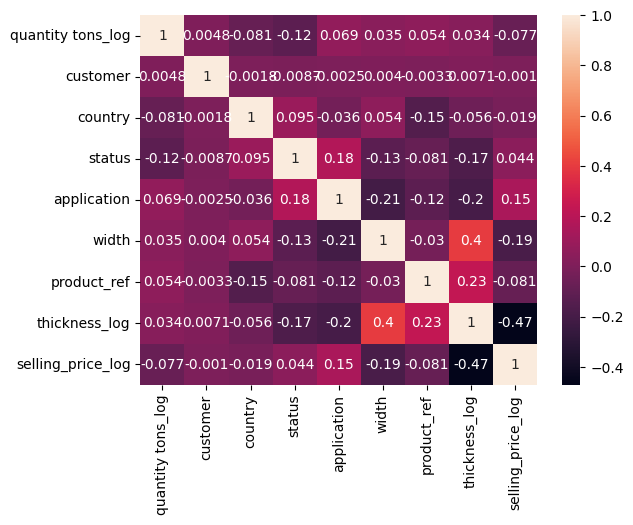

In [33]:
# Need to verify any columns are highly correlated using Heatmap. If any columns correalaion value >= 0.7 (absolute value), drop the columns.

col = ['quantity tons_log','customer','country','status','application','width','product_ref','thickness_log','selling_price_log']
df_heatmap = df3[col].corr()
sns.heatmap(df_heatmap, annot=True)

In [34]:
# The highest value is (0.4 or -0.42) only, So there is no columns are highly correlated and no need to drop any columns.

# **Wrong Delivery Date Handling**

In [35]:
df4 = df3.copy()
df4

,item_date,customer,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery date_1,quantity tons_log,thickness_log,selling_price_log
0,20210401.0,30156308.0,28.0,1,5.0,10.0,1500.0,1670798778,20210701.0,2021-04-01,2021-07-01,3.991779,0.693147,6.749931
1,20210401.0,30202938.0,25.0,1,5.0,41.0,1210.0,1668701718,20210401.0,2021-04-01,2021-04-01,6.643822,-0.223144,6.953684
2,20210401.0,30153963.0,30.0,1,6.0,28.0,952.0,628377,20210101.0,2021-04-01,2021-01-01,5.956169,-0.967584,6.468211
3,20210401.0,30349574.0,32.0,1,3.0,59.0,1317.0,1668701718,20210101.0,2021-04-01,2021-01-01,5.310301,0.832909,6.643790
4,20210401.0,30211560.0,28.0,1,5.0,10.0,1986.0,640665,20210301.0,2021-04-01,2021-03-01,6.666354,1.386294,6.357842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150443,20200702.0,30200854.0,25.0,1,5.0,41.0,1220.0,164141591,20200701.0,2020-07-02,2020-07-01,4.629691,-0.040822,6.381816
150444,20200702.0,30200854.0,25.0,1,5.0,41.0,1500.0,164141591,20200701.0,2020-07-02,2020-07-01,5.337954,-0.051293,6.378426
150445,20200702.0,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-07-01,1.443523,-0.342490,6.428105
150446,20200702.0,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-07-01,3.399022,-0.162519,6.398595


In [36]:
# The 'delivery date' is previous date of 'item date'. so this is impossible. delivery date is always greater.

In [37]:
df4['delivery date_1'] = pd.to_datetime(df4['delivery date_1'])
df4['item_date_1'] = pd.to_datetime(df4['item_date_1'])

df4['Date_difference'] = (df4['delivery date_1'] - df4['item_date_1']).dt.days
df4.head()


,item_date,customer,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery date_1,quantity tons_log,thickness_log,selling_price_log,Date_difference
0,20210401.0,30156308.0,28.0,1,5.0,10.0,1500.0,1670798778,20210701.0,2021-04-01,2021-07-01,3.991779,0.693147,6.749931,91
1,20210401.0,30202938.0,25.0,1,5.0,41.0,1210.0,1668701718,20210401.0,2021-04-01,2021-04-01,6.643822,-0.223144,6.953684,0
2,20210401.0,30153963.0,30.0,1,6.0,28.0,952.0,628377,20210101.0,2021-04-01,2021-01-01,5.956169,-0.967584,6.468211,-90
3,20210401.0,30349574.0,32.0,1,3.0,59.0,1317.0,1668701718,20210101.0,2021-04-01,2021-01-01,5.310301,0.832909,6.643790,-90
4,20210401.0,30211560.0,28.0,1,5.0,10.0,1986.0,640665,20210301.0,2021-04-01,2021-03-01,6.666354,1.386294,6.357842,-31


In [38]:
# convert the data type using pandas
df4['item_date_1'] = pd.to_datetime(df4['item_date_1'])

# split the day, month, and year from 'item_date_1' column and add dataframe (This data also help us to prediction)
df4['item_date_day'] = df4['item_date_1'].dt.day
df4['item_date_month'] = df4['item_date_1'].dt.month
df4['item_date_year'] = df4['item_date_1'].dt.year
df4

,item_date,customer,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery date_1,quantity tons_log,thickness_log,selling_price_log,Date_difference,item_date_day,item_date_month,item_date_year
0,20210401.0,30156308.0,28.0,1,5.0,10.0,1500.0,1670798778,20210701.0,2021-04-01,2021-07-01,3.991779,0.693147,6.749931,91,1,4,2021
1,20210401.0,30202938.0,25.0,1,5.0,41.0,1210.0,1668701718,20210401.0,2021-04-01,2021-04-01,6.643822,-0.223144,6.953684,0,1,4,2021
2,20210401.0,30153963.0,30.0,1,6.0,28.0,952.0,628377,20210101.0,2021-04-01,2021-01-01,5.956169,-0.967584,6.468211,-90,1,4,2021
3,20210401.0,30349574.0,32.0,1,3.0,59.0,1317.0,1668701718,20210101.0,2021-04-01,2021-01-01,5.310301,0.832909,6.643790,-90,1,4,2021
4,20210401.0,30211560.0,28.0,1,5.0,10.0,1986.0,640665,20210301.0,2021-04-01,2021-03-01,6.666354,1.386294,6.357842,-31,1,4,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150443,20200702.0,30200854.0,25.0,1,5.0,41.0,1220.0,164141591,20200701.0,2020-07-02,2020-07-01,4.629691,-0.040822,6.381816,-1,2,7,2020
150444,20200702.0,30200854.0,25.0,1,5.0,41.0,1500.0,164141591,20200701.0,2020-07-02,2020-07-01,5.337954,-0.051293,6.378426,-1,2,7,2020
150445,20200702.0,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-07-01,1.443523,-0.342490,6.428105,-1,2,7,2020
150446,20200702.0,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-07-01,3.399022,-0.162519,6.398595,-1,2,7,2020


In [39]:
# split the non-negative value of 'Date_difference' column in separate dataframe
df_f1 = df4[df4['Date_difference']>=0]

# after split, the index values are unordered. so need to reset the index to ascending order from 0
df_f1 = df_f1.reset_index(drop=True)
df_f1

,item_date,customer,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery date_1,quantity tons_log,thickness_log,selling_price_log,Date_difference,item_date_day,item_date_month,item_date_year
0,20210401.0,30156308.0,28.0,1,5.0,10.0,1500.0,1670798778,20210701.0,2021-04-01,2021-07-01,3.991779,0.693147,6.749931,91,1,4,2021
1,20210401.0,30202938.0,25.0,1,5.0,41.0,1210.0,1668701718,20210401.0,2021-04-01,2021-04-01,6.643822,-0.223144,6.953684,0,1,4,2021
2,20210401.0,30202938.0,25.0,1,5.0,41.0,1265.0,1668701718,20210401.0,2021-04-01,2021-04-01,5.419608,0.405465,6.890609,0,1,4,2021
3,20210401.0,30341428.0,38.0,1,3.0,10.0,1275.0,1668701376,20210701.0,2021-04-01,2021-07-01,4.235147,-0.510826,7.217443,91,1,4,2021
4,20210401.0,30202938.0,25.0,1,5.0,41.0,1165.0,1668701718,20210401.0,2021-04-01,2021-04-01,6.446714,0.405465,6.890609,0,1,4,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135787,20200702.0,30227718.0,25.0,0,3.0,15.0,1986.0,640665,20200801.0,2020-07-02,2020-08-01,3.472467,1.791759,6.313548,30,2,7,2020
135788,20200702.0,30161559.0,30.0,0,3.0,10.0,1525.0,640665,20200801.0,2020-07-02,2020-08-01,4.196171,1.348073,6.126869,30,2,7,2020
135789,20200702.0,30161559.0,30.0,0,3.0,10.0,1525.0,640665,20200801.0,2020-07-02,2020-08-01,4.156686,1.766442,6.124683,30,2,7,2020
135790,20200702.0,30161559.0,30.0,0,3.0,10.0,1500.0,640665,20200801.0,2020-07-02,2020-08-01,4.025862,2.060514,6.126869,30,2,7,2020


In [40]:
# split the negative value of 'Date_difference' column in another dataframe
df_f2 = df4[df4['Date_difference']<0]

# after split, the index values are unordered. so need to reset the index to ascending order from 0
df_f2 = df_f2.reset_index(drop=True)
df_f2

,item_date,customer,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery date_1,quantity tons_log,thickness_log,selling_price_log,Date_difference,item_date_day,item_date_month,item_date_year
0,20210401.0,30153963.0,30.0,1,6.0,28.0,952.0,628377,20210101.0,2021-04-01,2021-01-01,5.956169,-0.967584,6.468211,-90,1,4,2021
1,20210401.0,30349574.0,32.0,1,3.0,59.0,1317.0,1668701718,20210101.0,2021-04-01,2021-01-01,5.310301,0.832909,6.643790,-90,1,4,2021
2,20210401.0,30211560.0,28.0,1,5.0,10.0,1986.0,640665,20210301.0,2021-04-01,2021-03-01,6.666354,1.386294,6.357842,-31,1,4,2021
3,20210401.0,30342192.0,32.0,1,5.0,41.0,1220.0,611993,20210101.0,2021-04-01,2021-01-01,4.730808,-0.385662,6.836259,-90,1,4,2021
4,20210401.0,30342192.0,32.0,1,5.0,41.0,1220.0,611993,20210101.0,2021-04-01,2021-01-01,4.736160,-0.597837,6.860664,-90,1,4,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14651,20200702.0,30200854.0,25.0,1,5.0,41.0,1220.0,164141591,20200701.0,2020-07-02,2020-07-01,4.629691,-0.040822,6.381816,-1,2,7,2020
14652,20200702.0,30200854.0,25.0,1,5.0,41.0,1500.0,164141591,20200701.0,2020-07-02,2020-07-01,5.337954,-0.051293,6.378426,-1,2,7,2020
14653,20200702.0,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-07-01,1.443523,-0.342490,6.428105,-1,2,7,2020
14654,20200702.0,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-07-01,3.399022,-0.162519,6.398595,-1,2,7,2020


In [41]:
# These 16108 values 'delivery date' are lesser than 'item date'.
# First we need to train the ML model using correct 'delivery date' data (df_f1) and predict the 'Date_difference'(df_f2) using ML model.

In [42]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [43]:
df_f1.columns

Index(['item_date', 'customer', 'country', 'status', 'item type',
       'application', 'width', 'product_ref', 'delivery date', 'item_date_1',
       'delivery date_1', 'quantity tons_log', 'thickness_log',
       'selling_price_log', 'Date_difference', 'item_date_day',
       'item_date_month', 'item_date_year'],
      dtype='object')

In [44]:
# find best algorithm for prediction based on R2, mean absolute error, mean squared error and root mean squared error values

def machine_learning_delivery_date(df, algorithm):

    x = df.drop(columns=['item_date_1','delivery date_1','Date_difference'], axis=1)
    y = df['Date_difference']
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

    model = algorithm().fit(x_train, y_train)
    y_pred = model.predict(x_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    metrics = {'Algorithm': str(algorithm).split("'")[1].split(".")[-1],
               'R2': r2,
               'Mean Absolute Error': mae,
               'Mean Squared Error': mse,
               'Root Mean Squared Error': rmse}

    return metrics

In [45]:
print(machine_learning_delivery_date(df_f1, DecisionTreeRegressor), "\n")
print(machine_learning_delivery_date(df_f1, ExtraTreesRegressor), "\n")
print(machine_learning_delivery_date(df_f1, RandomForestRegressor), "\n")
print(machine_learning_delivery_date(df_f1, AdaBoostRegressor), "\n")
print(machine_learning_delivery_date(df_f1, GradientBoostingRegressor), "\n")
print(machine_learning_delivery_date(df_f1, XGBRegressor), "\n")


{'Algorithm': 'DecisionTreeRegressor', 'R2': 0.999802335662026, 'Mean Absolute Error': 0.006443536212673515, 'Mean Squared Error': 0.3068964247579071, 'Root Mean Squared Error': 0.5539823325322814} 

{'Algorithm': 'ExtraTreesRegressor', 'R2': 0.9999899081241173, 'Mean Absolute Error': 0.012686034095511653, 'Mean Squared Error': 0.015283493501233477, 'Root Mean Squared Error': 0.12362642719594172} 

{'Algorithm': 'RandomForestRegressor', 'R2': 0.9966974984040224, 'Mean Absolute Error': 0.017996244338893186, 'Mean Squared Error': 5.126766972274385, 'Root Mean Squared Error': 2.2642365097918513} 

{'Algorithm': 'AdaBoostRegressor', 'R2': 0.7093316686728359, 'Mean Absolute Error': 17.515978527509905, 'Mean Squared Error': 446.879816567344, 'Root Mean Squared Error': 21.139532080141795} 

{'Algorithm': 'GradientBoostingRegressor', 'R2': 0.9869053063272935, 'Mean Absolute Error': 3.234264503771393, 'Mean Squared Error': 20.376237581200918, 'Root Mean Squared Error': 4.514004605801917} 

{'Al

In [46]:
# Random Forest algorithm is low bias and reduce overfitting compared to others.

In [47]:
# train the model by using Random Forest Regression algorithm to predict 'Date difference'
# 'item_date_1','delivery date_1' - this columns are non-numerical and cannot passed, so skip the columns in model training and prediction.

def ml_date_difference():

    # train the model by using correct delivery date (df_f1) dataframe
    x = df_f1.drop(columns=['item_date_1','delivery date_1','Date_difference'], axis=1)
    y = df_f1['Date_difference']
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

    model = RandomForestRegressor().fit(x_train, y_train)

    # predict the 'Date_difference' of df_f2 columns using model
    y_pred_list = []

    for index, row in df_f2.iterrows():
        input_data = row.drop(['item_date_1','delivery date_1','Date_difference'])
        y_pred = model.predict([input_data])
        y_pred_list.append(y_pred[0])

    return y_pred_list

In [48]:
# Machine learning model predict the date difference of (df_f2) datafame
date_difference = ml_date_difference()

In [49]:
print(date_difference)

[13.81, 13.78, 0.0, 13.84, 13.84, 13.8, 13.83, 13.83, 0.0, 1.0, 1.0, 3.21, 3.23, 3.22, 3.23, 3.24, 3.22, 3.22, 3.22, 3.23, 3.22, 3.33, 3.23, 3.24, 3.28, 3.33, 3.33, 3.33, 3.22, 3.33, 3.22, 3.22, 3.22, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 3.41, 3.0, 3.29, 3.29, 3.29, 3.34, 4.55, 4.55, 4.55, 6.0, 6.0, 6.0, 5.88, 5.95, 5.79, 5.76, 5.83, 5.8, 5.84, 5.86, 8.0, 8.0, 8.0, 5.96, 5.96, 8.0, 8.0, 8.0, 8.0, 8.0, 6.21, 6.36, 6.37, 6.36, 6.36, 6.21, 6.19, 6.24, 6.19, 6.19, 6.24, 6.19, 6.29, 6.21, 6.27, 9.0, 9.0, 9.0, 9.0, 9.0, 6.36, 0.67, 0.67, 0.67, 0.67, 6.65, 6.65, 6.65, 6.59, 8.88, 13.0, 8.84, 8.81, 8.88, 13.0, 13.0, 13.0, 13.0, 13.0, 9.67, 9.67, 9.63, 9.66, 9.63, 9.63, 9.63, 9.63, 14.0, 9.63, 9.63, 11.18, 11.2, 11.18, 11.2, 11.21, 11.2, 11.2, 0.67, 11.9, 11.87, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 0.67, 16.0, 11.86, 11.86, 11.93, 16.0, 16.0, 12.37, 12.33, 12.42, 12.38, 17.0, 12.4, 12.42, 12.42, 12.42, 12.42, 12.42, 12.37, 12.4, 12.4, 12.37, 12.42, 17.0, 12.4, 12.4, 

In [50]:
# convert float values into integer using list comprehension method
date_difference1 = [int(round(i,0)) for i in date_difference]
print(date_difference1)

[14, 14, 0, 14, 14, 14, 14, 14, 0, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 2, 2, 2, 3, 3, 3, 3, 3, 3, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 8, 8, 8, 6, 6, 8, 8, 8, 8, 8, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 9, 9, 9, 9, 9, 6, 1, 1, 1, 1, 7, 7, 7, 7, 9, 13, 9, 9, 9, 13, 13, 13, 13, 13, 10, 10, 10, 10, 10, 10, 10, 10, 14, 10, 10, 11, 11, 11, 11, 11, 11, 11, 1, 12, 12, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 1, 16, 12, 12, 12, 16, 16, 12, 12, 12, 12, 17, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 17, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 20, 20, 20, 20, 20, 20, 14, 20, 20, 20, 21, 21, 21, 21, 21, 21, 14, 22, 14, 22, 22, 22, 22, 22, 22, 22, 14, 14, 22, 14, 14, 14, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 14, 14, 14, 24, 24, 24, 24, 14, 24, 24, 24, 

In [51]:
# add 'Date_difference' column in the dataframe
df_f2['Date_difference'] = pd.DataFrame(date_difference1)
df_f2

,item_date,customer,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery date_1,quantity tons_log,thickness_log,selling_price_log,Date_difference,item_date_day,item_date_month,item_date_year
0,20210401.0,30153963.0,30.0,1,6.0,28.0,952.0,628377,20210101.0,2021-04-01,2021-01-01,5.956169,-0.967584,6.468211,14,1,4,2021
1,20210401.0,30349574.0,32.0,1,3.0,59.0,1317.0,1668701718,20210101.0,2021-04-01,2021-01-01,5.310301,0.832909,6.643790,14,1,4,2021
2,20210401.0,30211560.0,28.0,1,5.0,10.0,1986.0,640665,20210301.0,2021-04-01,2021-03-01,6.666354,1.386294,6.357842,0,1,4,2021
3,20210401.0,30342192.0,32.0,1,5.0,41.0,1220.0,611993,20210101.0,2021-04-01,2021-01-01,4.730808,-0.385662,6.836259,14,1,4,2021
4,20210401.0,30342192.0,32.0,1,5.0,41.0,1220.0,611993,20210101.0,2021-04-01,2021-01-01,4.736160,-0.597837,6.860664,14,1,4,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14651,20200702.0,30200854.0,25.0,1,5.0,41.0,1220.0,164141591,20200701.0,2020-07-02,2020-07-01,4.629691,-0.040822,6.381816,30,2,7,2020
14652,20200702.0,30200854.0,25.0,1,5.0,41.0,1500.0,164141591,20200701.0,2020-07-02,2020-07-01,5.337954,-0.051293,6.378426,30,2,7,2020
14653,20200702.0,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-07-01,1.443523,-0.342490,6.428105,30,2,7,2020
14654,20200702.0,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-07-01,3.399022,-0.162519,6.398595,30,2,7,2020


In [52]:
# calculate delivery date (item_date + Date_difference = delivery_date)

def find_delivery_date(item_date, date_difference):

    result_date = item_date + timedelta(days=date_difference)

    delivery_date = result_date.strftime("%Y-%m-%d")

    return delivery_date

In [53]:
# find out the delivery date and add to dataframe

df_f2['item_date_1'] = pd.to_datetime(df_f2['item_date_1'])
df_f2['delivery date_1'] = df_f2.apply(lambda x: find_delivery_date(x['item_date_1'], x['Date_difference']), axis=1)
df_f2

,item_date,customer,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery date_1,quantity tons_log,thickness_log,selling_price_log,Date_difference,item_date_day,item_date_month,item_date_year
0,20210401.0,30153963.0,30.0,1,6.0,28.0,952.0,628377,20210101.0,2021-04-01,2021-04-15,5.956169,-0.967584,6.468211,14,1,4,2021
1,20210401.0,30349574.0,32.0,1,3.0,59.0,1317.0,1668701718,20210101.0,2021-04-01,2021-04-15,5.310301,0.832909,6.643790,14,1,4,2021
2,20210401.0,30211560.0,28.0,1,5.0,10.0,1986.0,640665,20210301.0,2021-04-01,2021-04-01,6.666354,1.386294,6.357842,0,1,4,2021
3,20210401.0,30342192.0,32.0,1,5.0,41.0,1220.0,611993,20210101.0,2021-04-01,2021-04-15,4.730808,-0.385662,6.836259,14,1,4,2021
4,20210401.0,30342192.0,32.0,1,5.0,41.0,1220.0,611993,20210101.0,2021-04-01,2021-04-15,4.736160,-0.597837,6.860664,14,1,4,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14651,20200702.0,30200854.0,25.0,1,5.0,41.0,1220.0,164141591,20200701.0,2020-07-02,2020-08-01,4.629691,-0.040822,6.381816,30,2,7,2020
14652,20200702.0,30200854.0,25.0,1,5.0,41.0,1500.0,164141591,20200701.0,2020-07-02,2020-08-01,5.337954,-0.051293,6.378426,30,2,7,2020
14653,20200702.0,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-08-01,1.443523,-0.342490,6.428105,30,2,7,2020
14654,20200702.0,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-08-01,3.399022,-0.162519,6.398595,30,2,7,2020


In [54]:
# Finally concatinate the both dataframe into single dataframe
df_final = pd.concat([df_f1,df_f2], axis=0, ignore_index=True)
df_final

,item_date,customer,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery date_1,quantity tons_log,thickness_log,selling_price_log,Date_difference,item_date_day,item_date_month,item_date_year
0,20210401.0,30156308.0,28.0,1,5.0,10.0,1500.0,1670798778,20210701.0,2021-04-01,2021-07-01 00:00:00,3.991779,0.693147,6.749931,91,1,4,2021
1,20210401.0,30202938.0,25.0,1,5.0,41.0,1210.0,1668701718,20210401.0,2021-04-01,2021-04-01 00:00:00,6.643822,-0.223144,6.953684,0,1,4,2021
2,20210401.0,30202938.0,25.0,1,5.0,41.0,1265.0,1668701718,20210401.0,2021-04-01,2021-04-01 00:00:00,5.419608,0.405465,6.890609,0,1,4,2021
3,20210401.0,30341428.0,38.0,1,3.0,10.0,1275.0,1668701376,20210701.0,2021-04-01,2021-07-01 00:00:00,4.235147,-0.510826,7.217443,91,1,4,2021
4,20210401.0,30202938.0,25.0,1,5.0,41.0,1165.0,1668701718,20210401.0,2021-04-01,2021-04-01 00:00:00,6.446714,0.405465,6.890609,0,1,4,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150443,20200702.0,30200854.0,25.0,1,5.0,41.0,1220.0,164141591,20200701.0,2020-07-02,2020-08-01,4.629691,-0.040822,6.381816,30,2,7,2020
150444,20200702.0,30200854.0,25.0,1,5.0,41.0,1500.0,164141591,20200701.0,2020-07-02,2020-08-01,5.337954,-0.051293,6.378426,30,2,7,2020
150445,20200702.0,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-08-01,1.443523,-0.342490,6.428105,30,2,7,2020
150446,20200702.0,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-08-01,3.399022,-0.162519,6.398595,30,2,7,2020


In [55]:
# split the day, month, and year from 'delivery_date_1' column and add dataframe (This data also help us to prediction)

df_final['delivery date_1'] = pd.to_datetime(df_final['delivery date_1'])

df_final['delivery_date_day'] = df_final['delivery date_1'].dt.day
df_final['delivery_date_month'] = df_final['delivery date_1'].dt.month
df_final['delivery_date_year'] = df_final['delivery date_1'].dt.year

# finally drop the item_date, delivery_date and date_difference columns
df_final.drop(columns=['item_date','delivery date','item_date_1','delivery date_1','Date_difference'], inplace=True)
df_final

,customer,country,status,item type,application,width,product_ref,quantity tons_log,thickness_log,selling_price_log,item_date_day,item_date_month,item_date_year,delivery_date_day,delivery_date_month,delivery_date_year
0,30156308.0,28.0,1,5.0,10.0,1500.0,1670798778,3.991779,0.693147,6.749931,1,4,2021,1,7,2021
1,30202938.0,25.0,1,5.0,41.0,1210.0,1668701718,6.643822,-0.223144,6.953684,1,4,2021,1,4,2021
2,30202938.0,25.0,1,5.0,41.0,1265.0,1668701718,5.419608,0.405465,6.890609,1,4,2021,1,4,2021
3,30341428.0,38.0,1,3.0,10.0,1275.0,1668701376,4.235147,-0.510826,7.217443,1,4,2021,1,7,2021
4,30202938.0,25.0,1,5.0,41.0,1165.0,1668701718,6.446714,0.405465,6.890609,1,4,2021,1,4,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150443,30200854.0,25.0,1,5.0,41.0,1220.0,164141591,4.629691,-0.040822,6.381816,2,7,2020,1,8,2020
150444,30200854.0,25.0,1,5.0,41.0,1500.0,164141591,5.337954,-0.051293,6.378426,2,7,2020,1,8,2020
150445,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,1.443523,-0.342490,6.428105,2,7,2020,1,8,2020
150446,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,3.399022,-0.162519,6.398595,2,7,2020,1,8,2020


# **Classification Method - Predict Status**

In [56]:
from imblearn.combine import SMOTETomek
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import pickle

In [57]:
# df_final = pd.read_csv("https://raw.githubusercontent.com/gopiashokan/Industrial-Copper-Modeling/main/data/final_data.csv")

In [58]:
df_final.head()

,customer,country,status,item type,application,width,product_ref,quantity tons_log,thickness_log,selling_price_log,item_date_day,item_date_month,item_date_year,delivery_date_day,delivery_date_month,delivery_date_year
0,30156308.0,28.0,1,5.0,10.0,1500.0,1670798778,3.991779,0.693147,6.749931,1,4,2021,1,7,2021
1,30202938.0,25.0,1,5.0,41.0,1210.0,1668701718,6.643822,-0.223144,6.953684,1,4,2021,1,4,2021
2,30202938.0,25.0,1,5.0,41.0,1265.0,1668701718,5.419608,0.405465,6.890609,1,4,2021,1,4,2021
3,30341428.0,38.0,1,3.0,10.0,1275.0,1668701376,4.235147,-0.510826,7.217443,1,4,2021,1,7,2021
4,30202938.0,25.0,1,5.0,41.0,1165.0,1668701718,6.446714,0.405465,6.890609,1,4,2021,1,4,2021


In [59]:
# check data types
df_final.dtypes

customer               float64
country                float64
status                   int64
item type              float64
application            float64
width                  float64
product_ref              int64
quantity tons_log      float64
thickness_log          float64
selling_price_log      float64
item_date_day            int32
item_date_month          int32
item_date_year           int32
delivery_date_day        int32
delivery_date_month      int32
delivery_date_year       int32
dtype: object

In [60]:
df_c = df_final.copy()

# filter the status column values only 1 & 0 rows in a new dataframe ['Won':1 & 'Lost':0]
df_c = df_c[(df_c.status == 1) | (df_c.status == 0)]
df_c

,customer,country,status,item type,application,width,product_ref,quantity tons_log,thickness_log,selling_price_log,item_date_day,item_date_month,item_date_year,delivery_date_day,delivery_date_month,delivery_date_year
0,30156308.0,28.0,1,5.0,10.0,1500.0,1670798778,3.991779,0.693147,6.749931,1,4,2021,1,7,2021
1,30202938.0,25.0,1,5.0,41.0,1210.0,1668701718,6.643822,-0.223144,6.953684,1,4,2021,1,4,2021
2,30202938.0,25.0,1,5.0,41.0,1265.0,1668701718,5.419608,0.405465,6.890609,1,4,2021,1,4,2021
3,30341428.0,38.0,1,3.0,10.0,1275.0,1668701376,4.235147,-0.510826,7.217443,1,4,2021,1,7,2021
4,30202938.0,25.0,1,5.0,41.0,1165.0,1668701718,6.446714,0.405465,6.890609,1,4,2021,1,4,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150443,30200854.0,25.0,1,5.0,41.0,1220.0,164141591,4.629691,-0.040822,6.381816,2,7,2020,1,8,2020
150444,30200854.0,25.0,1,5.0,41.0,1500.0,164141591,5.337954,-0.051293,6.378426,2,7,2020,1,8,2020
150445,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,1.443523,-0.342490,6.428105,2,7,2020,1,8,2020
150446,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,3.399022,-0.162519,6.398595,2,7,2020,1,8,2020


In [61]:
# check no of rows (records) of each 1 and 0 in dataframe
df_c['status'].value_counts()

status
1    116010
0     34438
Name: count, dtype: int64

In [62]:
# in status feature, the 'Won' and 'Lost' value difference is very high. So we need to oversampling to reduce the difference

x = df_c.drop('status', axis=1)
y = df_c['status']

x_new, y_new = SMOTETomek().fit_resample(x,y)

In [63]:
x.shape, y.shape, x_new.shape, y_new.shape

((150448, 15), (150448,), (229598, 15), (229598,))

In [64]:
# check the accuracy of training and testing using metrics
# algorithm.__name__  - it return the algorithm name

def machine_learning_classification(x_new,y_new, algorithm):

    x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, test_size=0.2, random_state=42)
    model = algorithm().fit(x_train, y_train)

    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    accuracy_train = metrics.accuracy_score(y_train, y_pred_train)
    accuracy_test = metrics.accuracy_score(y_test, y_pred_test)

    # algo = str(algorithm).split("'")[1].split(".")[-1]
    accuracy_metrics = {'algorithm'    : algorithm.__name__,
                        'accuracy_train': accuracy_train,
                        'accuracy_test' : accuracy_test}

    return accuracy_metrics

In [65]:
print(machine_learning_classification(x_new, y_new, DecisionTreeClassifier))
print(machine_learning_classification(x_new, y_new, ExtraTreesClassifier))
print(machine_learning_classification(x_new, y_new, RandomForestClassifier))
print(machine_learning_classification(x_new, y_new, AdaBoostClassifier))
print(machine_learning_classification(x_new, y_new, GradientBoostingClassifier))
print(machine_learning_classification(x_new, y_new, XGBClassifier))

{'algorithm': 'DecisionTreeClassifier', 'accuracy_train': 1.0, 'accuracy_test': 0.9658536585365853}
{'algorithm': 'ExtraTreesClassifier', 'accuracy_train': 1.0, 'accuracy_test': 0.9860844947735191}
{'algorithm': 'RandomForestClassifier', 'accuracy_train': 1.0, 'accuracy_test': 0.9838196864111498}
{'algorithm': 'AdaBoostClassifier', 'accuracy_train': 0.7673047398164179, 'accuracy_test': 0.7691202090592334}
{'algorithm': 'GradientBoostingClassifier', 'accuracy_train': 0.8206807565413387, 'accuracy_test': 0.8212108013937283}
{'algorithm': 'XGBClassifier', 'accuracy_train': 0.9534947026862226, 'accuracy_test': 0.9479529616724739}


In [66]:
# before oversampling result
# {'algorithm': 'DecisionTreeClassifier', 'accuracy_train': 1.0, 'accuracy_test': 0.9528082419408441}
# {'algorithm': 'ExtraTreesClassifier', 'accuracy_train': 1.0, 'accuracy_test': 0.9733466267863078}
# {'algorithm': 'RandomForestClassifier', 'accuracy_train': 1.0, 'accuracy_test': 0.9705217680292456}
# {'algorithm': 'AdaBoostClassifier', 'accuracy_train': 0.8135011631771353, 'accuracy_test': 0.8114988368228647}
# {'algorithm': 'GradientBoostingClassifier', 'accuracy_train': 0.8358507809903623, 'accuracy_test': 0.8345297441010302}
# {'algorithm': 'XGBClassifier', 'accuracy_train': 0.9452725157859754, 'accuracy_test': 0.9325024925224327}

In [67]:
# we got good accuracy after oversampling
# ExtraTreesClassifier and RandomForestClassifier both have good testing accuracy, but in training accuracy is overfitting.
# RandomForestClassifier is good interpretability, so i select the algorithm

In [68]:
# GridsearchCV is a cross validation function.

# Hyper parameter tuning - we give parameter values manually in the algorithm to reduce the overfitting issue and get better accuracy.

# so using gridserachcv method - to pass the mulitiple values in each parameters and it try to evaluate all the combination of values and
# finally return the best accuracy parameter values based on the score.

# example: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}

# note: This process can take long time (avg: 1 hour 15 mins). Please wait be patient.

In [69]:
# refer parameter values: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [70]:
x_train, x_test, y_train, y_test = train_test_split(x_new,y_new,test_size=0.2,random_state=42)

param_grid = {
    'max_depth': [5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}


grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 10], 'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5]})

In [71]:
# n_jobs = -1 means it uses the all processors in this process

In [72]:
# evaluate all the parameter combinations and return the best parameters based on score
grid_search.best_params_

{'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [73]:
grid_search.best_score_

0.8837367642532519

In [74]:
# passing the parameters in the random forest algorithm and check the accuracy for training and testing

x_train, x_test, y_train, y_test = train_test_split(x_new,y_new,test_size=0.2,random_state=42)

model = RandomForestClassifier(max_depth=20, max_features='sqrt', min_samples_leaf=1, min_samples_split=2).fit(x_train, y_train)
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)
accuracy_train = metrics.accuracy_score(y_train, y_pred_train)
accuracy_test = metrics.accuracy_score(y_test, y_pred_test)
accuracy_train, accuracy_test

(0.988360064896177, 0.9736280487804878)

In [75]:
# now the training accuracy overfitting reduced. so now model will predict effectively for unseen data

In [76]:
# predict the status and check the accuracy using metrics

x_train, x_test, y_train, y_test = train_test_split(x_new,y_new,test_size=0.2,random_state=42)

model = RandomForestClassifier(max_depth=20, max_features='sqrt', min_samples_leaf=1, min_samples_split=2).fit(x_train, y_train)
y_pred = model.predict(x_test)

print(confusion_matrix(y_true=y_test, y_pred=y_pred))
print(classification_report(y_true=y_test, y_pred=y_pred))

[[22928   188]
 [ 1030 21774]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     23116
           1       0.99      0.95      0.97     22804

    accuracy                           0.97     45920
   macro avg       0.97      0.97      0.97     45920
weighted avg       0.97      0.97      0.97     45920



In [77]:
# Receiver Operating Characteristic (ROC) Curve and Area Under the Curve (AUC)

FP,TP,threshold = roc_curve(y_true=y_test, y_score=y_pred)
auc_curve = auc(x=FP, y=TP)
print(auc_curve)

0.9733497952821639


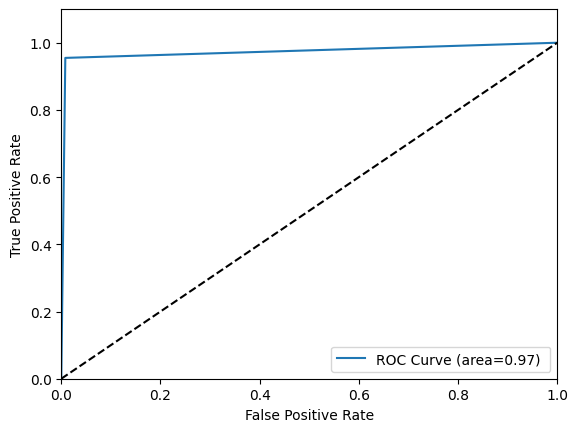

In [78]:
plt.plot(FP, TP, label=f"ROC Curve (area={round(auc_curve, 2)}) ")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.10])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

In [79]:
# will pass the user data manually to check the prediction of status ar our model

user_data = np.array([[30153963, 30, 6, 28, 952, 628377, 5.9, -0.96, 6.46, 1,4,2021,1,1,2021]])
y_p = model.predict(user_data)
if y_p[0] == 1:
    print('Won')
else:
    print('Lose')

Won


In [80]:
user_data = np.array([[30223403, 78, 5, 10, 1500, 1668701718, 2.2, 0, 7.13, 1,4,2021,1,7,2021]])
y_p = model.predict(user_data)
if y_p[0] == 1:
    print('Won')
else:
    print('Lose')

Lose


In [81]:
import sklearn
print(sklearn.__version__)

1.4.0


In [82]:
# Note:
# google colab sklearn version is 1.2.2
# so if you save your model in pickle in colab and download to your system.
# after you load the model in your system for prediction measns ----> your system have same 1.2.2 version of sklearn
# otherwise it cannot load in your system and it shows error

In [83]:
# save the classification model by using pickle

import pickle

with open('classification_model.pkl', 'wb') as f:
    pickle.dump(model, f)


In [84]:
# Now successfully saved our model in 'classification_model.pkl' pickle file.
# Hereafter you can load and using this pickle file only to predict the status. (don't need any packages - only need numpy for pass user input)

In [85]:
# load pickle model to predict the status (like Trained brain).

with open('classification_model.pkl', 'rb') as f:
    model = pickle.load(f)

user_data = np.array([[30223403, 78, 5, 10, 1500, 1668701718, 2.2, 0, 7.13, 1,4,2021,1,7,2021]])
y_p = model.predict(user_data)
if y_p[0] == 1:
    print('Won')
else:
    print('Lose')

Lose


# **Regression Method - Prdict Selling Price**

In [86]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
import pickle

In [87]:
df_final

,customer,country,status,item type,application,width,product_ref,quantity tons_log,thickness_log,selling_price_log,item_date_day,item_date_month,item_date_year,delivery_date_day,delivery_date_month,delivery_date_year
0,30156308.0,28.0,1,5.0,10.0,1500.0,1670798778,3.991779,0.693147,6.749931,1,4,2021,1,7,2021
1,30202938.0,25.0,1,5.0,41.0,1210.0,1668701718,6.643822,-0.223144,6.953684,1,4,2021,1,4,2021
2,30202938.0,25.0,1,5.0,41.0,1265.0,1668701718,5.419608,0.405465,6.890609,1,4,2021,1,4,2021
3,30341428.0,38.0,1,3.0,10.0,1275.0,1668701376,4.235147,-0.510826,7.217443,1,4,2021,1,7,2021
4,30202938.0,25.0,1,5.0,41.0,1165.0,1668701718,6.446714,0.405465,6.890609,1,4,2021,1,4,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150443,30200854.0,25.0,1,5.0,41.0,1220.0,164141591,4.629691,-0.040822,6.381816,2,7,2020,1,8,2020
150444,30200854.0,25.0,1,5.0,41.0,1500.0,164141591,5.337954,-0.051293,6.378426,2,7,2020,1,8,2020
150445,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,1.443523,-0.342490,6.428105,2,7,2020,1,8,2020
150446,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,3.399022,-0.162519,6.398595,2,7,2020,1,8,2020


In [88]:
df_final.columns

Index(['customer', 'country', 'status', 'item type', 'application', 'width',
       'product_ref', 'quantity tons_log', 'thickness_log',
       'selling_price_log', 'item_date_day', 'item_date_month',
       'item_date_year', 'delivery_date_day', 'delivery_date_month',
       'delivery_date_year'],
      dtype='object')

In [89]:
# check the train and test accuracy using R2 (R-squared ---> coefficient of determination) to predict selling price

def machine_learning_regression(df, algorithm):

    x = df.drop(columns=['selling_price_log'], axis=1)
    y = df['selling_price_log']
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

    model = algorithm().fit(x_train, y_train)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    # algo = str(algorithm).split("'")[1].split(".")[-1]
    accuracy_metrics = {'algorithm': algorithm.__name__,
                        'R2_train' : r2_train,
                        'R2_test'  : r2_test}

    return accuracy_metrics

In [90]:
print(machine_learning_regression(df_final, DecisionTreeRegressor))
print(machine_learning_regression(df_final, ExtraTreesRegressor))
print(machine_learning_regression(df_final, RandomForestRegressor))
print(machine_learning_regression(df_final, AdaBoostRegressor))
print(machine_learning_regression(df_final, GradientBoostingRegressor))
print(machine_learning_regression(df_final, XGBRegressor))

{'algorithm': 'DecisionTreeRegressor', 'R2_train': 0.9999103322989553, 'R2_test': 0.9299163567346639}
{'algorithm': 'ExtraTreesRegressor', 'R2_train': 0.9999103322989553, 'R2_test': 0.9554203226465608}
{'algorithm': 'RandomForestRegressor', 'R2_train': 0.9942971344897564, 'R2_test': 0.9594203342035135}
{'algorithm': 'AdaBoostRegressor', 'R2_train': 0.7255896256688599, 'R2_test': 0.7266613202495915}
{'algorithm': 'GradientBoostingRegressor', 'R2_train': 0.8921639875966871, 'R2_test': 0.8916712979443719}
{'algorithm': 'XGBRegressor', 'R2_train': 0.9521753929511001, 'R2_test': 0.9457203829674904}


In [91]:
# ExtraTreesClassifier and RandomForestClassifier both have good testing accuracy, but in training accuracy is overfitting.
# RandomForestClassifier is good interpretability, so i select the algorithm

# already i explained about GridsearchCV in classification method

In [92]:
x = df_final.drop(columns=['selling_price_log'], axis=1)
y = df_final['selling_price_log']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

param_grid_r = {
    'max_depth': [5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2', None]
}


grid_search_r = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid_r, cv=5, n_jobs=-1)
grid_search_r.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [5, 10],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5]})

In [93]:
# best parameters for hypertuning the random forest algorithm for better accuracy in unseen data
grid_search_r.best_params_,grid_search_r.best_score_

({'max_depth': 10,
  'max_features': None,
  'min_samples_leaf': 1,
  'min_samples_split': 2},
 0.9142521612290777)

In [94]:
# pass the parameters and check the accuracy for both training and testing & overfitting

x = df_final.drop(columns=['selling_price_log'], axis=1)
y = df_final['selling_price_log']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

model = RandomForestRegressor(max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=2).fit(x_train, y_train)
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
r2_train, r2_test

(0.988439233725791, 0.9594165243670582)

In [95]:
# before hypertuning = 'algorithm': 'RandomForestRegressor', 'R2_train': 0.9940176821065443, 'R2_test': 0.9572742394942817

# compare before and after hypertuning, reduced the overfitting in training

In [96]:
# predict the selling price with hypertuning parameters and calculate the accuracy using metrics

x = df_final.drop(columns=['selling_price_log'], axis=1)
y = df_final['selling_price_log']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

model = RandomForestRegressor(max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=2).fit(x_train, y_train)
y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

metrics_r = {'R2': r2,
           'Mean Absolute Error': mae,
           'Mean Squared Error': mse,
           'Root Mean Squared Error': rmse}

metrics_r

{'R2': 0.9595283218983088,
 'Mean Absolute Error': 0.030446375740860503,
 'Mean Squared Error': 0.002302587084428523,
 'Root Mean Squared Error': 0.04798527987235797}

In [97]:
# manually passed the user input and predict the selling price

user_data = np.array([[30202938,25,1,5,41,1210,1668701718,6.6,-0.2,1,4,2021,1,4,2021]])
y_pred = model.predict(user_data)
y_pred[0]

6.931715782631972

In [98]:
# using Inverse Log Transformation to convert the value to original scale of the data (exp)
np.exp(y_pred[0])

1024.249862960472

In [99]:
import sklearn
print(sklearn.__version__)

1.4.0


In [100]:
# Note:
# google colab sklearn version is 1.2.2
# so if you save your model in pickle in colab and download to your system.
# after you load the model in your system for prediction measns ----> your system have same 1.2.2 version of sklearn
# otherwise it cannot load in your system and it shows error

In [101]:
# save the regression model by using pickle

with open('regression_model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [102]:
# Now successfully saved our model in 'regression_model.pkl' pickle file.
# Hereafter you can load and using this pickle file only to predict the selling price. (don't need any packages - only need numpy for pass user input)

In [103]:
# load the pickle model to predict selling price

with open('regression_model.pkl', 'rb') as f:
    model = pickle.load(f)

y_pred = model.predict(np.array([[30202938,25,1,5,41,1210,1668701718,6.6,-0.2,1,4,2021,1,4,2021]]))
np.exp(y_pred[0])

1024.249862960472